# Lending Club Case Study

> Submitted By Sourav Sirohi (5623940) and Sidharth Rai (5760097)

## Problem Statement

#### Business Understanding:
* Lending Club, a consumer finance company which specializes in lending various types of loans to urban customers.
* There are two primary risks associated with loan approval decisions:
  - Loss of business if loans aren't approved.
  - Financial loss if loans default.
* The dataset provided contains information on past loan applicants and their loan statuses, aiming to identify patterns
indicating loan default tendencies.
#### Business Objective:
* Minimize credit loss by identifying risky loan applicants.
* Understand the driving factors behind loan default to optimize risk assessment and reduce credit loss.
* By identifying risky loan applicants, the company aims to reduce credit loss and enhance risk assessment processes.
#### Data Understanding:
* The dataset contains complete loan data for all loans issued from 2007 to 2011, including information on loan statuses such as 'Fully Paid' and 'Charged Off’.
* Referring to the provided data dictionary for a description of the variables included in the dataset.

## Approach

1. Import Libraries & Dataset
2. Data Cleaning
3. Univariate Analysis
4. Bivariate Analysis
5. Conclusion
6. Recommendationa

## 1. Import the Libraries & Dataset

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Suppersing the warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing loan data into a DataFrame df0
df0 = pd.read_csv('Dataset/loan/loan.csv')

## 2. Data Cleaning

In [4]:
# Conducting some initial analysis

print(df0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [5]:
# checking how many columns are containing null values

len(df0.columns[df0.isnull().mean()*100 == 100])

54

In [6]:
# dropping columns which contains only null values

df1 = df0.dropna(axis = 1, how = 'all')

# df1 is the new dataframe that we obtained after dropping all the columns which contain only null/NA values
# we will conduct further univariant analysis on this dataframe

## 3. Univariate Analysis 

Analysis of the remaining 57 columns

### Analysis on column-1 id
#### Attribute description: A unique LC assigned ID for the loan listing.

#### Observation:
> 1. There are no duplicates
> 2. This attribute will not be used in the analysis as it doesn't provide any information about default

In [7]:
# This is an identifier attribute and we will check if it contains all unique values or not
total_count = df1.shape[0]
unique_count = len(df0['id'].unique())

print(f'All the values in this column are unique? {total_count == unique_count}. \nIf True then no further analysis is needed.')

All the values in this column are unique? True. 
If True then no further analysis is needed.


### Analysis on column-2 member_id 
#### Attribute description: A unique LC assigned Id for the borrower member.
#### Observation:
> 1. There are no duplicates
> 2. This attribute will not be used in the analysis as it doesn't provide any information about default

In [8]:
# This is an identifier attribute and we will check if it contains all unique values or not
total_count = df1.shape[0]
unique_count = len(df0['member_id'].unique())

print(f'All the values in this column are unique? {total_count == unique_count}. \nIf True then no further analysis is needed.')

All the values in this column are unique? True. 
If True then no further analysis is needed.


### Analysis on column-3 loan_amnt
#### Attribute description: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

#### Observations:
> 1. The difference between 0 percentile and 25th percentile is roughly same as the difference between 50th percentile and 25th percentile which inturn is colse to the difference between 75th percentile and 50th percentile. However difference between 100th percentile and 75th percentile is roughly 4 times the difference between 75th percentile and 50th percentile. This suggest that the loan amount has a skwed distribution toward the right.
> 2. By analysing the below box plot we can conclude that loan amount is skewed toward right and has outliers toward the higher range
> 3. By analysing the histogram, we identified an interesting pattern, for amount that are multiple of 5000 like 5000, 10000, 15000, 20000 have higher demands


In [9]:
df1['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

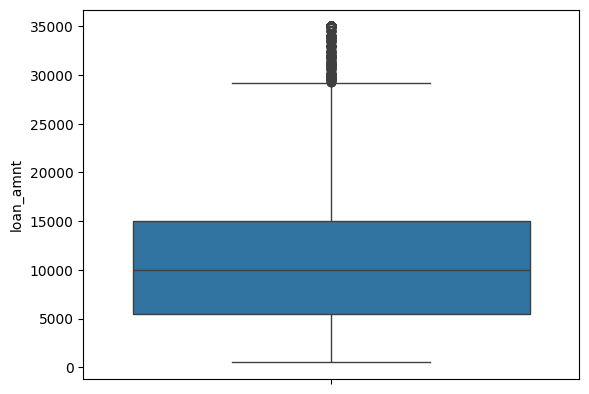

In [10]:
# Ploting the box plot on this data

sns.boxplot(df1['loan_amnt'])
plt.show()

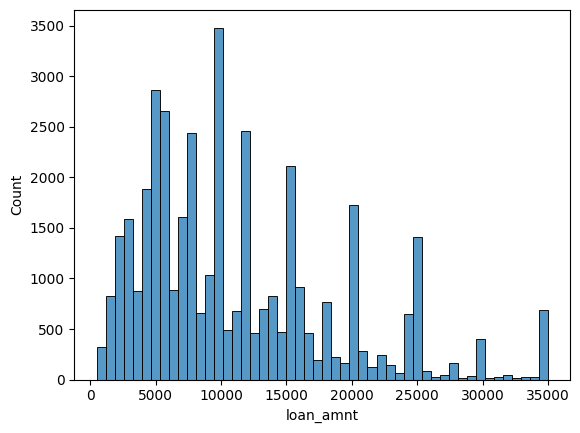

In [11]:
# plotting histogram to see the distribution of loan amount

sns.histplot(df1['loan_amnt'], bins = 50)
plt.show()

### Analysis on column-4 funded_amnt
#### Attribute description: The total amount committed to that loan at that point in time.

#### Observations:
> 1. The difference between 0 percentile and 25th percentile is roughly same as the difference between 50th percentile and 25th percentile which inturn is colse to the difference between 75th percentile and 50th percentile. However difference between 100th percentile and 75th percentile is roughly 4 times the difference between 75th percentile and 50th percentile. This suggest that the committed amount has a skwed distribution toward the right.
> 2. By analysing the below box plot we can conclude that committed amount is skewed toward right and has outliers toward the higher range
> 3. By analysing the histogram, we identified an interesting pattern, for amount that are multiple of 5000 like 5000, 10000, 15000, 20000 have higher demands
> 4. Committed amount follow the similar distribution as that of the loan requested amount.

In [12]:
df1['funded_amnt'].describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

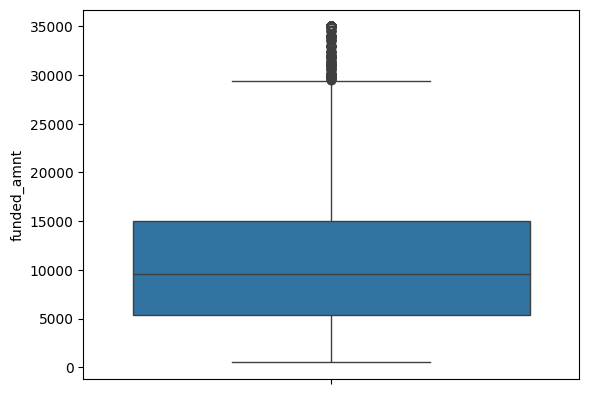

In [13]:
# Ploting the box plot on this data
sns.boxplot(df1['funded_amnt'])
plt.show()

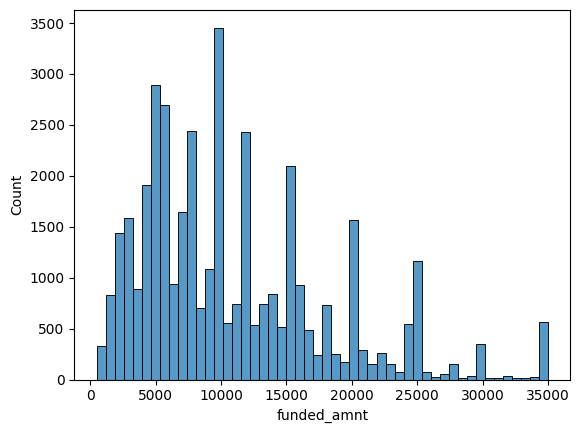

In [14]:
# plotting histogram to see the distribution of loan amount

sns.histplot(df1['funded_amnt'], bins = 50)
plt.show()

### Analysis on column-5 funded_amnt_inv
#### Attribute description: The total amount committed by investors for that loan at that point in time.

#### Observations:
> 1. The difference between 0 percentile and 25th percentile is roughly same as the difference between 50th percentile and 25th percentile which inturn is colse to the difference between 75th percentile and 50th percentile. However difference between 100th percentile and 75th percentile is roughly 4 times the difference between 75th percentile and 50th percentile. This suggest that the loan amount committed by investors has a skwed distribution toward the right.
> 2. By analysing the below box plot we can conclude that loan amount committed by investors is skewed toward right and has outliers toward the higher range
> 3. By analysing the histogram, we identified an interesting pattern, for amount that are multiple of 5000 like 5000, 10000, 15000, 20000 have higher demands
> 4. The loan amount committed by investors also follow the similar distribution as that of loan request amount and committed amount

In [15]:
df1['funded_amnt_inv'].describe()

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

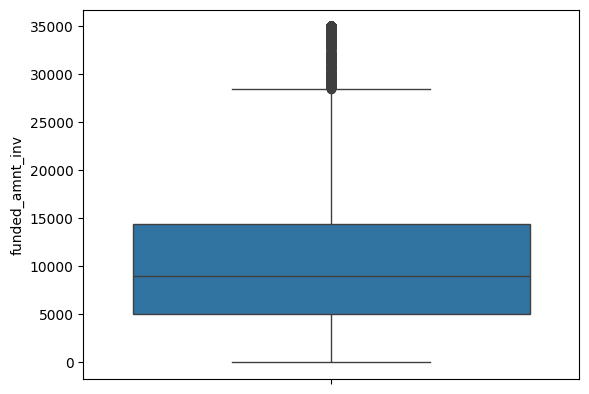

In [16]:
# Ploting the box plot on this data
sns.boxplot(df1['funded_amnt_inv'])
plt.show()

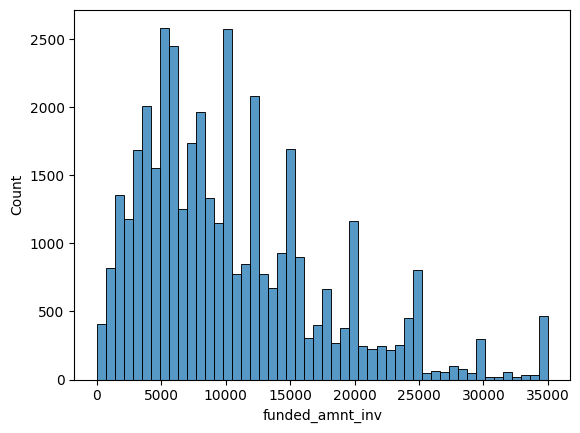

In [17]:
# plotting histogram to see the distribution of loan amount

sns.histplot(df1['funded_amnt_inv'], bins = 50)
plt.show()

### Analysis on column-6 term
#### Attribute description: The number of payments on the loan. Values are in months and can be either 36 or 60.

#### Observations:
> 1. Term is a categorical attribute with only two values i.e. 36 month or 60 month
> 2. Roughly 73% of the loan matures in 3 years and 27% of the loan have tenure of 5 years

term
36 months    73.26
60 months    26.74
Name: proportion, dtype: float64


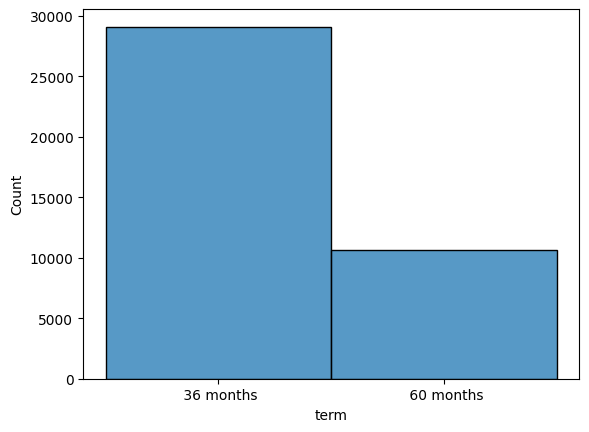

In [18]:
print(f'{round(df1["term"].value_counts(normalize=True)*100,2)}')

# Plotting histogram
sns.histplot(df1['term'])
plt.show()

### Analysis on column-7 int_rate
#### Attribute description: Interest Rate on the loan

#### Observations:
> 1. Interest rate is of type object, we will create another column called int_rate_pct, in this column will store the percentage as floating point number and conduct further analysis on this new attribute
> 2. Interest rate distribution is skewed toward the right

In [19]:
df1['int_rate'].describe()

count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object

In [20]:
df1['int_rate_pct'] = df1['int_rate'].str.rstrip('%').astype(float)
df1['int_rate_pct'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate_pct, dtype: float64

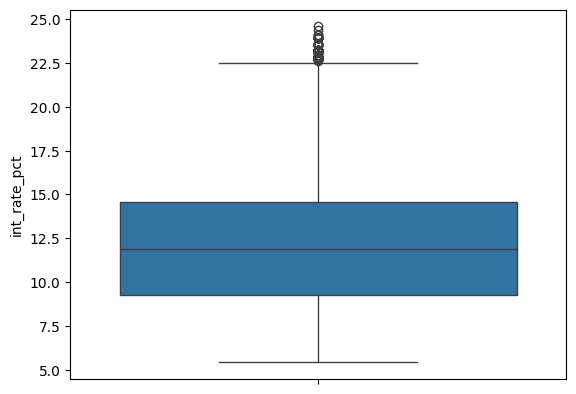

In [21]:
# Ploting the box plot on this data

sns.boxplot(df1['int_rate_pct'])
plt.show()

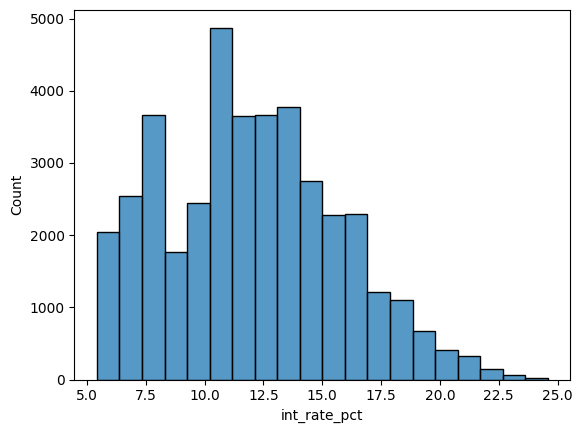

In [22]:
# plotting histogram to see the distributions
sns.histplot(df1['int_rate_pct'], bins = 20)
plt.show()

In [23]:
# Often high interest rate leads to higher emi, which makes it difficult to serivce the loan and may lead to default, however
# it is important to understand the high interest rate is often charged to high risk customer as a compensation for the risk,
# and hence it is quite natural that we observe higher correlation between intrest rate and default. 

# we will create a categorical variable based on interest rate
    # Upto 1st quartile will be calssified as low interest
    # From 1st quartile to median will be classified as medium
    # from median to 75th quartile will be classified as medium high
    # From 75th quartile to 100th quartile will be classified as high
    # outlier will be classified as extermily high

def int_cat(x):
    if x < 9.25:
        return 'Low'
    elif x>= 9.25 and x < 11.86:
        return 'Medium'
    elif x>= 11.86 and x < 14.59:
        return 'Medium High'
    elif x >= 14.49 and x < 20:
        return 'High'
    else:
        return 'Extermily HIgh'

df1['int_rate_cat']  = df1['int_rate_pct'].apply(int_cat)
print(df1.int_rate_cat.value_counts(normalize = True)*100)

int_rate_cat
Medium            25.067352
Medium High       24.996853
Low               24.896140
High              22.844122
Extermily HIgh     2.195533
Name: proportion, dtype: float64


### Analysis on column-8 installment
#### Attribute description: The monthly payment owed by the borrower if the loan originates.

#### Observations:
> 1. Installment are highly skewed toward right with quite many outliers

In [24]:
df1['installment'].describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

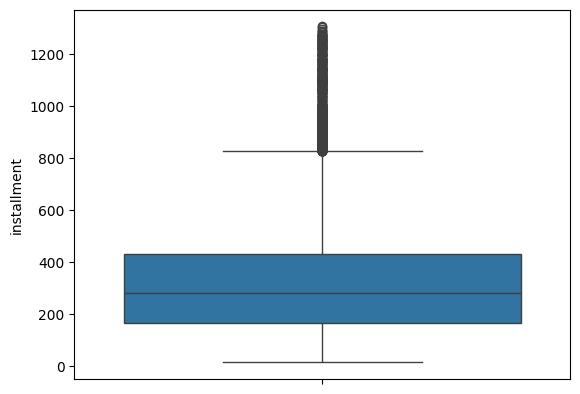

In [25]:
# Ploting the box plot on this data
sns.boxplot(df1['installment'])
plt.show()

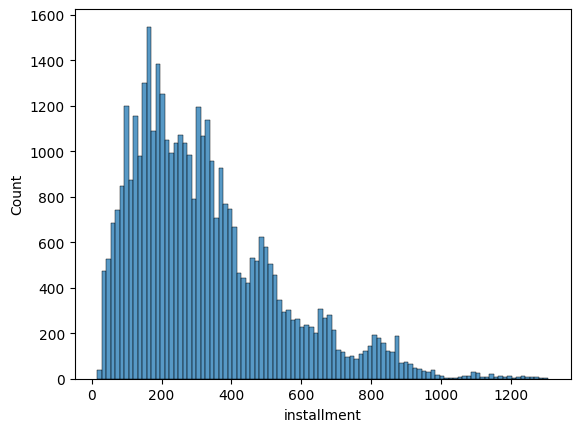

In [26]:
# plotting histogram to see the distribution of loan amount

sns.histplot(df1['installment'], bins = 100)
plt.show()

### Analysis on column-9&10 Grade and Subgrade
#### Attribute description: Grade - LC assigned loan subgrade & Subgrade - LC assigned loan subgrade

#### Observations:
> 1. Grade indicate the credit worthiness of a borrower with A being the being the best and G being the worst
> 2. Subgrade further divide a given grade into 5 categories from 1 to 5, where 1 being the best and 5 being the worst in a given grade
> 3. Customer with Grade B are the highest in number and from here onward it monotonically reduces from B toward G, which is quite natural as bank tends to issue less loan to high risk customer

grade
B    30.26
A    25.39
C    20.39
D    13.36
E     7.16
F     2.64
G     0.80
Name: proportion, dtype: float64


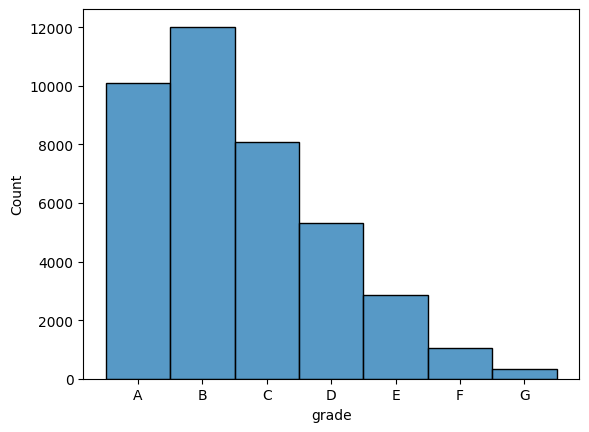

                   id
grade sub_grade      
A     A1         1139
      A2         1508
      A3         1810
      A4         2886
      A5         2742
B     B1         1830
      B2         2057
      B3         2917
      B4         2512
      B5         2704
C     C1         2136
      C2         2011
      C3         1529
      C4         1236
      C5         1186
D     D1          931
      D2         1348
      D3         1173
      D4          981
      D5          874
E     E1          763
      E2          656
      E3          553
      E4          454
      E5          416
F     F1          329
      F2          249
      F3          185
      F4          168
      F5          118
G     G1          104
      G2           78
      G3           48
      G4           56
      G5           30
Ploting subgrade for grade A


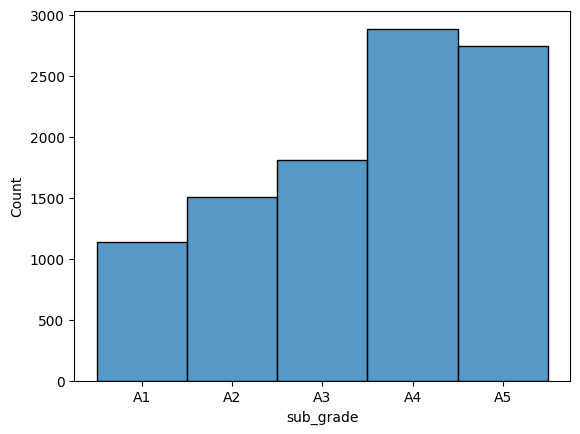

Ploting subgrade for grade B


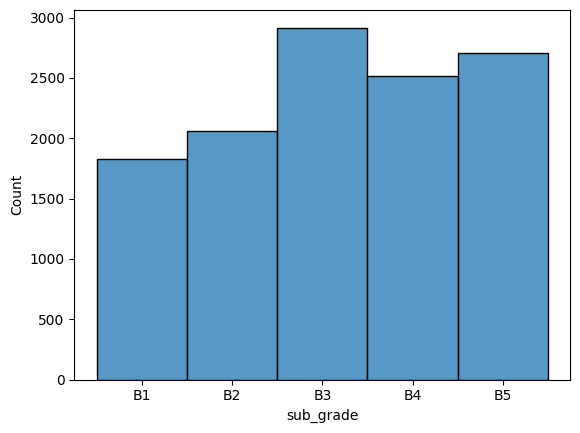

Ploting subgrade for grade C


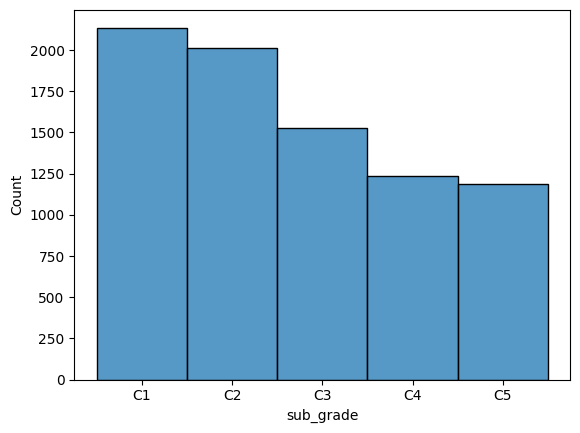

Ploting subgrade for grade D


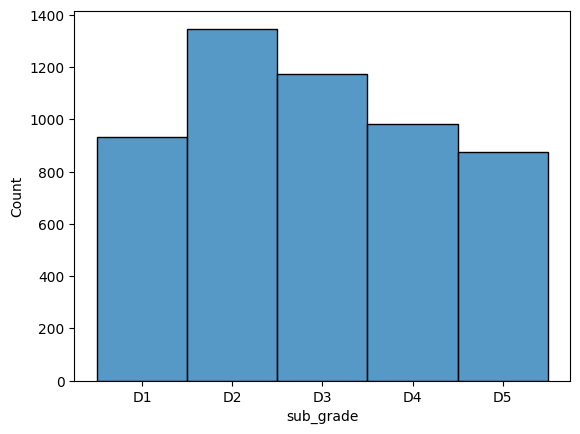

Ploting subgrade for grade E


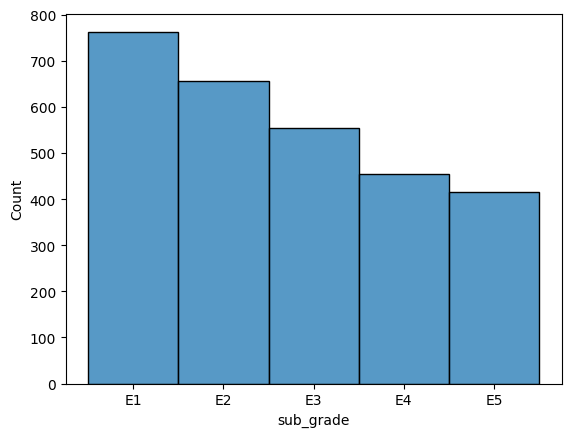

Ploting subgrade for grade F


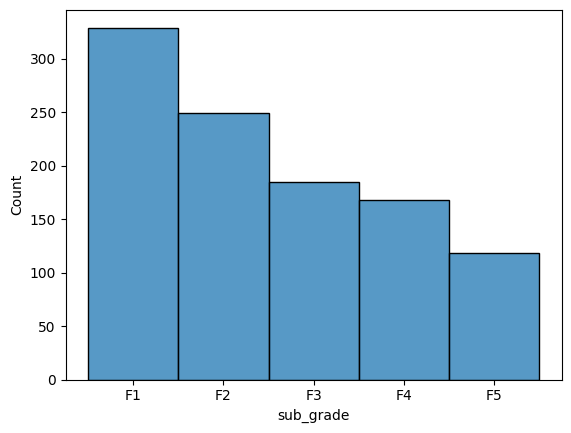

Ploting subgrade for grade G


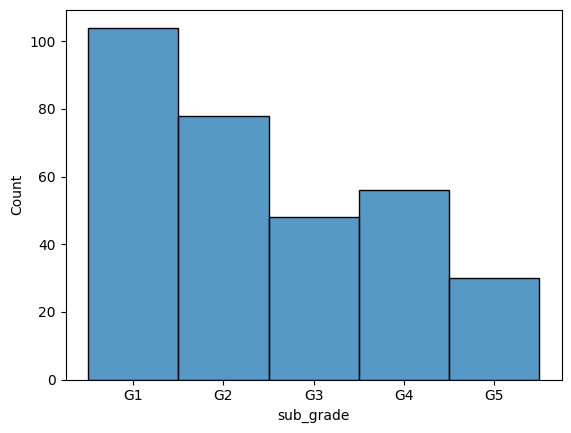

In [27]:
# plotting histogram to see the distribution of grade

print(round(df1['grade'].value_counts(normalize = True)*100,2))
sns.histplot(df1['grade'].sort_values())
plt.show()

# viewing the distribution on subgrade within a grade
print(df1[['grade','sub_grade','id']].groupby(by = ['grade','sub_grade']).count())

# Ploting distribution of sub_grade within a grade
for i in df1['grade'].sort_values().unique():
    cond1 = df1['grade'] == i
    print(f'Ploting subgrade for grade {i}')
    sns.histplot(df1[cond1]['sub_grade'].sort_values())
    plt.show()

### Analysis on column-11 emp_title
#### Attribute description: The job title supplied by the Borrower when applying for the loan
#### Observations:
> 1. This attribute doesn't add much value to the analysis and hence we will drop this attribute

In [28]:
del df1['emp_title']

### Analysis on column-12 emp_length
#### Attribute description: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

#### Observations:
> 1. For 1075 observation employee length is null
> 2. For the 1075 observation where employee length is null, we will update these rows with "10+ years" as this category is the highest occuring value

In [29]:
length_null = df1.emp_length.isna().sum()
length_count = df1.emp_length.value_counts()

print(f'null count = {length_null} \nDistinct count:\n{length_count}')

null count = 1075 
Distinct count:
emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


In [30]:
df1.loc[df1.emp_length.isna(),'emp_length'] = '10+ years'

In [31]:
length_null = df1.emp_length.isna().sum()
length_count = df1.emp_length.value_counts()

print(f'null count = {length_null} \nDistinct count:\n{length_count}')

null count = 0 
Distinct count:
emp_length
10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


### Analysis on column-13 home_ownership
#### Attribute description: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

#### Observations:
> 1. 47% of the borrower have a rental accomodation, 44% of the borrower have a mortgaged house, nearly 8% owns a house and hence neither pay a mortgage nor rent for accomodation. Less than 1% of the people have other ways of accomodation.
> 2. More than 90% of borrower have a regular cashout outflow in the form of either mortage payment or in the form of rent.

home_ownership
RENT        47.58
MORTGAGE    44.46
OWN          7.70
OTHER        0.25
NONE         0.01
Name: proportion, dtype: float64


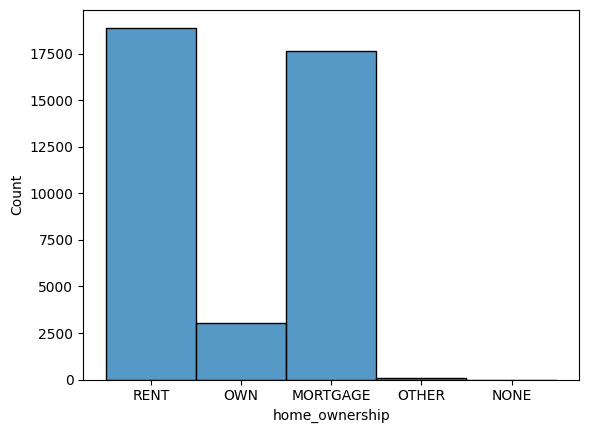

In [32]:
print(round(df1.home_ownership.value_counts(normalize = True)*100,2))
sns.histplot(df1.home_ownership)
plt.show()

### Analysis on column-14 annual_inc
#### Attribute description: The self-reported annual income provided by the borrower during registration.

#### Observations:
> 1. Anual income is highly skewed toward right with 75% of borrower earning less than 823k per annum and the median income of top 25% earners is 107k with maximum being 6 million
> 2. There are 14 borrower with anual income of 1 million or above these are clearly the outlier

In [33]:
pd.options.display.float_format = '{:.2f}'.format
print(df1.annual_inc.describe())

#analysis of top 25%
print('\n')
print(df1[df1.annual_inc > 1000000].annual_inc.describe())

# income above 1 million
df1[df1.annual_inc >= 1000000].annual_inc.sort_values()

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64


count        14.00
mean    1909270.29
std     1384596.04
min     1080000.00
25%     1200000.00
50%     1306000.00
75%     1870500.00
max     6000000.00
Name: annual_inc, dtype: float64


28906   1080000.00
27564   1176000.00
21412   1200000.00
24166   1200000.00
25762   1200000.00
33432   1200000.00
10621   1250000.00
34304   1362000.00
33982   1440000.00
7247    1782000.00
23551   1900000.00
39089   2039784.00
29639   3900000.00
30107   6000000.00
Name: annual_inc, dtype: float64

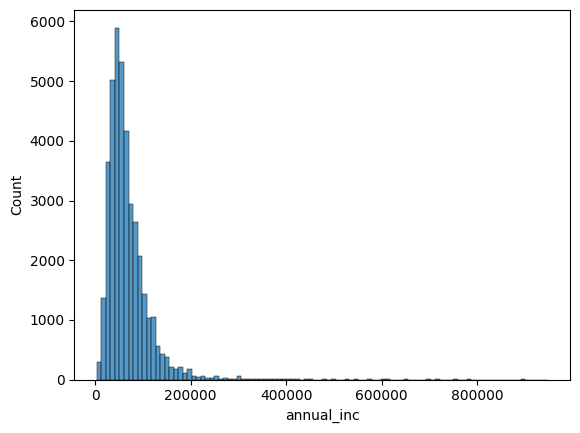

In [34]:

# Distribution of income which are less than 1 million
sns.histplot(df1[df1.annual_inc < 1000000].annual_inc, bins = 100)
plt.show()

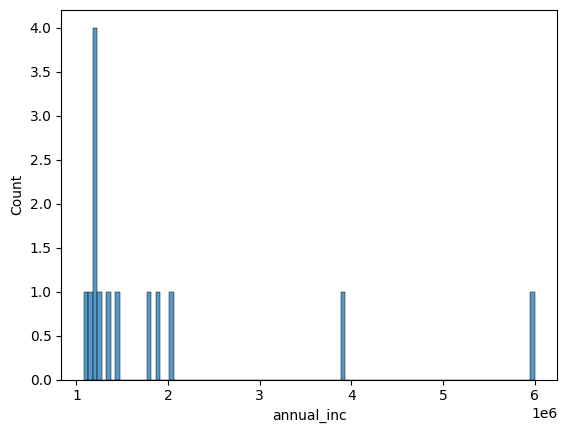

In [35]:
# Distribution of income which are grater than 1 million
sns.histplot(df1[df1.annual_inc > 1000000].annual_inc, bins = 100)
plt.show()

### Analysis on column-15 verification_status
#### Attribute description: Indicates if income was verified by LC, not verified, or if the income source was verified

#### Observations:
> 1. For roughly 43% borrower the loan company couldn't verify the income status
> 2. Varification status doesn't add much value toward default and non default



verification_status
Not Verified      42.60
Verified          32.25
Source Verified   25.15
Name: proportion, dtype: float64


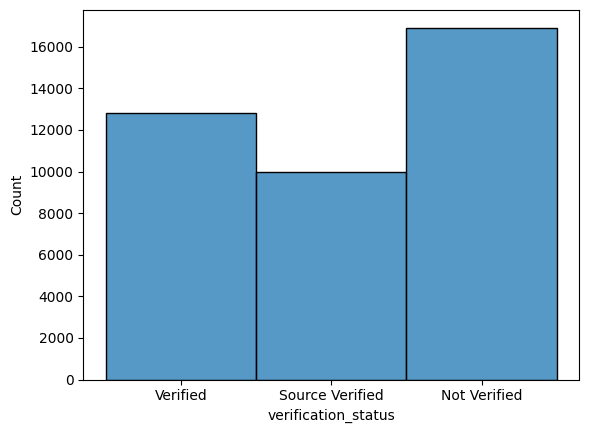

In [36]:
print(df1.verification_status.value_counts(normalize = True) * 100)
sns.histplot(df1.verification_status)
plt.show()

### Analysis on column-16 issue_d
#### Attribute description: The month & year which the loan was funded

#### Observations:
> 1. From this attribute we can separate the month and year into two separate columns
> 2. Issue date ranges from Jun 2007 to Dec 2011
> 3. Number of loan issued has increaced monotonically from 2007 to 2011.
> 4. Except for 2007 and 2008, every year number of loan issued has increased monotonically from Jan to Dec



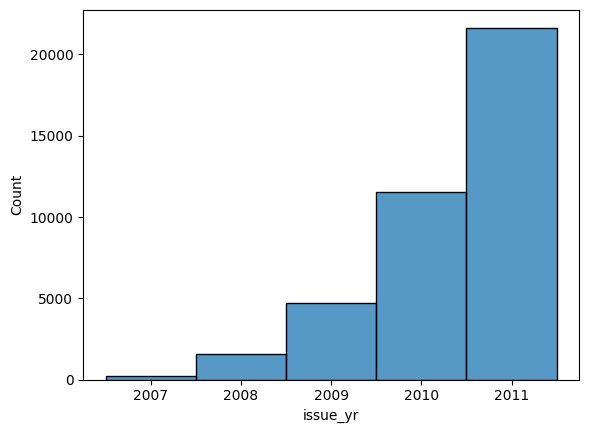

In [37]:
#df['interest_rate'] = df['interest_rate'].str.rstrip('%').astype(float)
#df1[['issue_mnt','issue_yr']] =
df1['issue_yr'] = '20'+df1['issue_d'].str.split('-').str[1]
df1['issue_mnt'] = df1['issue_d'].str.split('-').str[0]

sns.histplot(df1['issue_yr'].sort_values())
plt.show()

Ploting distribution of loan issue per month for the year 2007


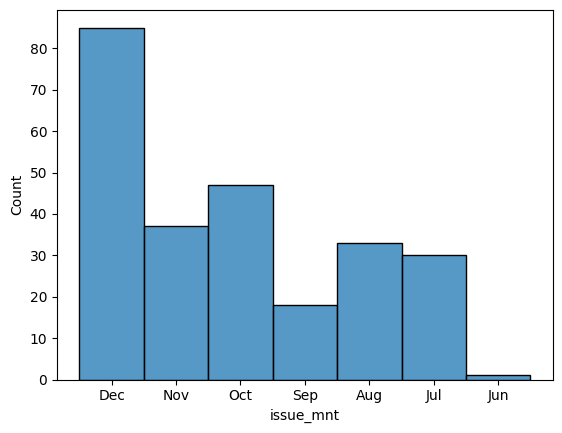

Ploting distribution of loan issue per month for the year 2008


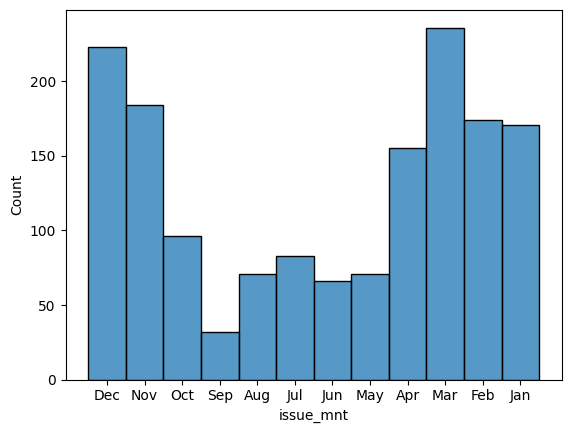

Ploting distribution of loan issue per month for the year 2009


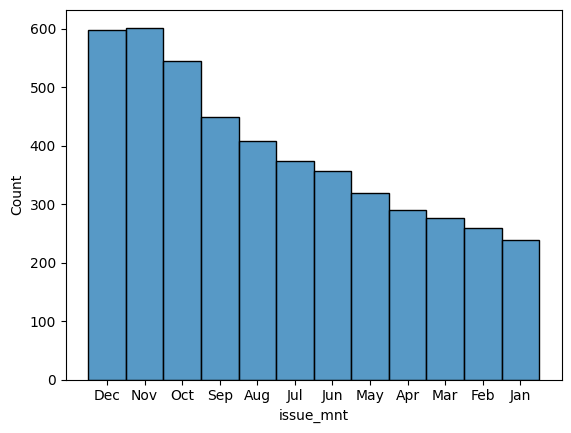

Ploting distribution of loan issue per month for the year 2010


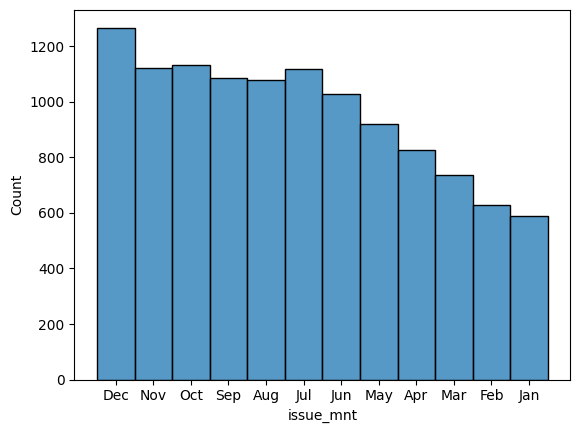

Ploting distribution of loan issue per month for the year 2011


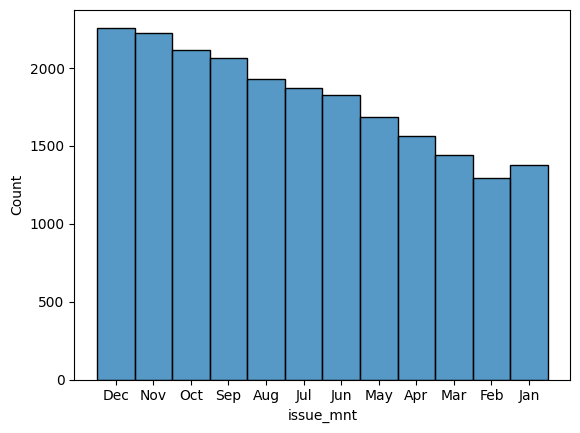

In [38]:
for i in df1['issue_yr'].sort_values().unique():
    print(f'Ploting distribution of loan issue per month for the year {i}')
    sns.histplot(df1[df1['issue_yr'] == i]['issue_mnt'])
    plt.show()

### Analysis on column-17 loan_status
#### Attribute description: Current status of the loan

#### Observations:
> 1. 83% of borrower have paid their debt in full and 14% have defaulted and the remaining 3% are currently in the process of repayment
> 2. The 3% of borrower whose file is currently active, will not add any value to our analysis of drivers impacting the defalt or non-default and hence we will drop these observation from our dataset later on


loan_status
Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: proportion, dtype: float64


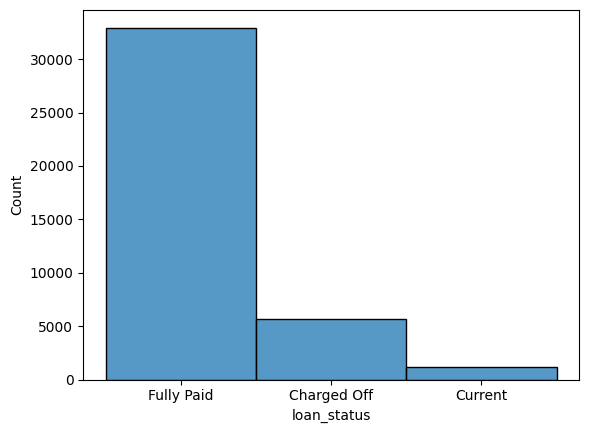

In [39]:
print(df1.loan_status.value_counts(normalize = True) * 100)
sns.histplot(df1.loan_status)
plt.show()

### Analysis on column-18 pymnt_plan
#### Attribute description: Indicates if a payment plan has been put in place for the loan

#### Observations:
> 1. This attribute only contains one value and hence it will not add much value for the analysis. This can be dropped

In [40]:
df1.pymnt_plan.value_counts()

pymnt_plan
n    39717
Name: count, dtype: int64

In [41]:
del df1['pymnt_plan']

### Analysis on column-19 (url) and column-20 (desc) and column-22 (title)
#### Attribute description: 
> url: URL for the LC page with listing data<br>
> desc: Loan description provided by the borrower  
> title: The loan title provided by the borrower    

#### Observations:
> 1. These attributes does not add much value to the analysis and hence we will drop these. 

In [42]:
del df1['url']
del df1['desc']
del df1['title']

### Analysis on column-21 purpose
#### Attribute description: A category provided by the borrower for the loan request. 

#### Observations:
> 1. Over 60% of loans are being used for debt consolidation and credit card payment which also a form of debt consolidation

purpose
debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: proportion, dtype: float64


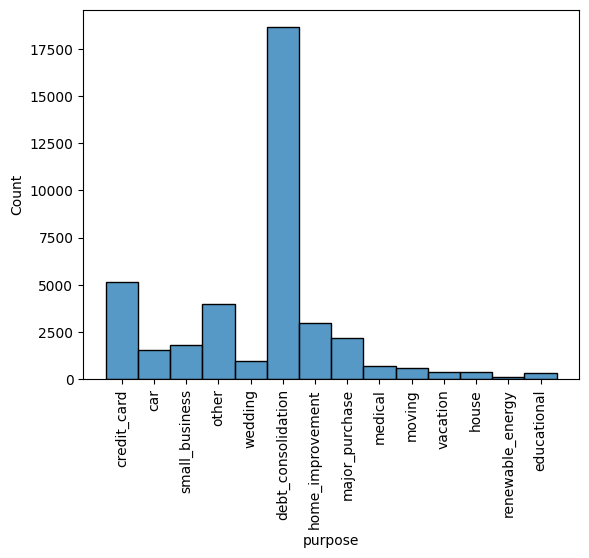

In [43]:
print(df1.purpose.value_counts(normalize = True)*100)
sns.histplot(df1.purpose)
plt.xticks(rotation=90)
plt.show()

### Analysis on column-23 (zip code) and column-24 (address state)
#### Attribute description: 
> Zip Code - The first 3 numbers of the zip code provided by the borrower in the loan application.<br>
> addr_state - The state provided by the borrower in the loan application

#### Observations:
> 1. CA, NY, FL, TX, NJ, IL are responsible for over 50% of the loan portfolio

In [44]:
df1.addr_state.value_counts(normalize = True)*100

addr_state
CA   17.87
NY    9.60
FL    7.22
TX    6.87
NJ    4.66
IL    3.84
PA    3.82
VA    3.54
GA    3.52
MA    3.37
OH    3.08
MD    2.64
AZ    2.21
WA    2.11
CO    1.99
NC    1.98
CT    1.89
MI    1.81
MO    1.73
MN    1.55
NV    1.25
SC    1.19
WI    1.16
AL    1.14
OR    1.14
LA    1.10
KY    0.82
OK    0.75
KS    0.68
UT    0.65
AR    0.62
DC    0.54
RI    0.50
NM    0.48
WV    0.45
HI    0.44
NH    0.43
DE    0.29
MT    0.21
WY    0.21
AK    0.20
SD    0.16
VT    0.14
MS    0.05
TN    0.04
IN    0.02
ID    0.02
IA    0.01
NE    0.01
ME    0.01
Name: proportion, dtype: float64

### Analysis on column-25 (dti)
#### Attribute description: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

#### Observations:
> 1. For DTI greater than 5 and less than 25 the distribution is fairly symitrical, however beyond 25 we see a sudden drop in loan borrowers, which indicate that for borrowers with very high debt to income ratio the company doesn't grant loan that often.

In [45]:
df1.dti.describe()

count   39717.00
mean       13.32
std         6.68
min         0.00
25%         8.17
50%        13.40
75%        18.60
max        29.99
Name: dti, dtype: float64

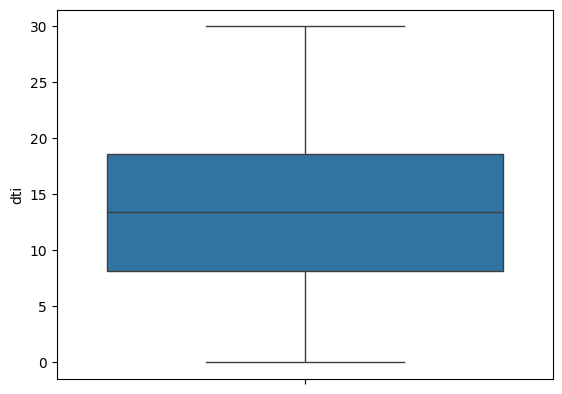

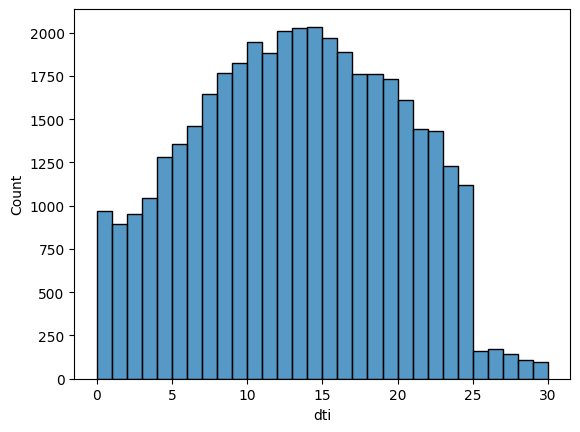

In [46]:
sns.boxplot(df1.dti)
plt.show()
sns.histplot(df1.dti, bins=30)
plt.show()

### Analysis on column-26 (delinq_2yrs)
#### Attribute description: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

#### Observations:
> 1. For almost 90% of the cases there were no incidence of dlienquency in last 2 years.
> 2. For 8% of the cases there were 1 incident of dlienquency in past 2 years.
> 3. For the remaining 2% of cases there were 2 or more incidentof dliquency with 2 being the maximum and 11 being the minimum

delinq_2yrs
0    89.14
1     8.32
2     1.73
3     0.55
4     0.16
5     0.06
6     0.03
7     0.01
8     0.01
9     0.00
11    0.00
Name: proportion, dtype: float64


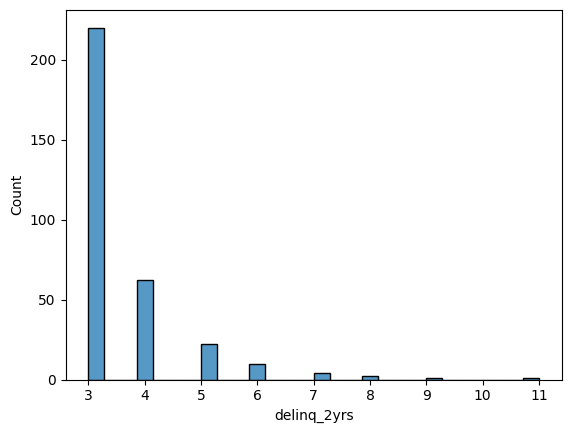

In [47]:
print(df1.delinq_2yrs.value_counts(normalize = True)*100)
sns.histplot(df1[df1.delinq_2yrs > 2].delinq_2yrs)
plt.show()

### Analysis on column-27 (earliest_cr_line)
#### Attribute description: The month the borrower's earliest reported credit line was opened

#### Observations:
> 1. This attribute can be used with the issue_mnt and issue_yr to derive another attribute called len_cr_hist i.e. length of credit history. we can further study if length of credit history has any impact of default or not.
> 2. Creating an attribute crl_duration by calculating the difference between earliest credit line year and issue year, this will give us a good approximation of duration a borrower is known to the company
> 3. We observe that credit line duration is also highly skewed data

In [48]:
df1[['earliest_crl_mnt', 'earliest_crl_yr']] = df1['earliest_cr_line'].str.split('-', expand=True)

df1['earliest_crl_yr'] = df1['earliest_crl_yr'].astype(int)

flag = df1['earliest_crl_yr']<= 20  #select where the year is less than or equal to 20

df1.loc[flag, 'earliest_crl_yr'] += 2000 #part 1 - add 2000 e.g. - makes 24 to 2024

df1.loc[~flag, 'earliest_crl_yr'] += 1900 #part 2 - add 1900 to remaining e.g. makes 99 to 1999

In [49]:
df1['crl_duration'] = df1['issue_yr'].astype(int) - df1['earliest_crl_yr']

In [50]:
df1.crl_duration.describe()

count   39717.00
mean       13.77
std         6.84
min         3.00
25%         9.00
50%        13.00
75%        17.00
max        65.00
Name: crl_duration, dtype: float64

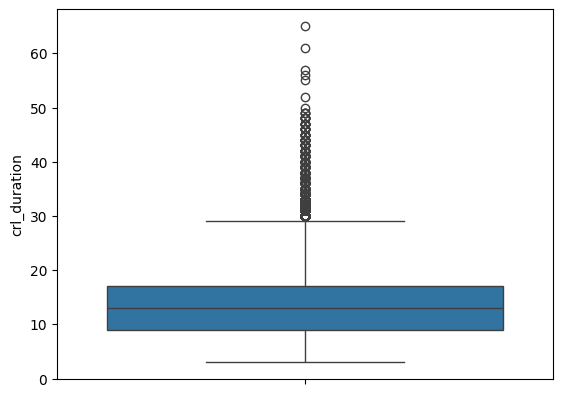

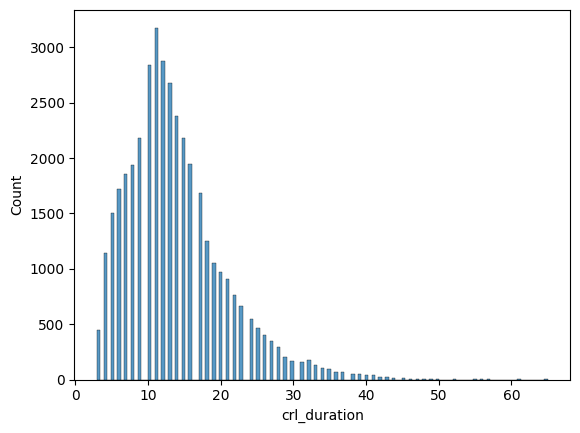

In [51]:
sns.boxplot(df1.crl_duration)
plt.show()
sns.histplot(df1.crl_duration)
plt.show()

### Analysis on column-28 (inq_last_6mths)
#### Attribute description: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

#### Observations:
> 1. Roughly 49% of borrower have made 0 inquiries
> 2. Roughly 49% of borrower have made 1 to 3 inquiries
> 3. Roughly 2% of borrower have made more then 3 inquiries

In [52]:
df1.inq_last_6mths.value_counts(normalize = True) * 100

inq_last_6mths
0   48.59
1   27.62
2   14.63
3    7.67
4    0.82
5    0.37
6    0.16
7    0.09
8    0.04
Name: proportion, dtype: float64

### Analysis on column-29 (mths_since_last_delinq)  and column-48 (nxt_pymnt_d)
#### Attribute description: 
> mths_since_last_delinq:The number of months since the borrower's last delinquency.<br>

> nxt_pymnt_d: Next scheduled payment date
 

#### Observations:
> 1. mths_since_last_delinq   is null for 65% of the data observation

> 3. next_pymnt_d             is applicable only for current loan, which is eitherway not going to part of our analysis.
> We can drop  these 2 columns from our data frame

In [53]:
(df1[['mths_since_last_delinq','mths_since_last_record','next_pymnt_d']].isna().sum()/df1.shape[0])*100

mths_since_last_delinq   64.66
mths_since_last_record   92.99
next_pymnt_d             97.13
dtype: float64

In [54]:
del df1['mths_since_last_delinq']

del df1['next_pymnt_d']

### Analysis on column-31 (open_acc)
#### Attribute description: The number of open credit lines in the borrower's credit file.years

#### Observations:
> 1. Distribution of open account is skwed toward the right, showing that there are outliers

count   39717.00
mean        9.29
std         4.40
min         2.00
25%         6.00
50%         9.00
75%        12.00
max        44.00
Name: open_acc, dtype: float64


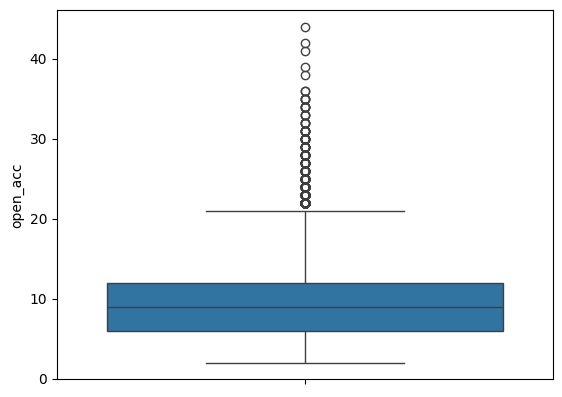

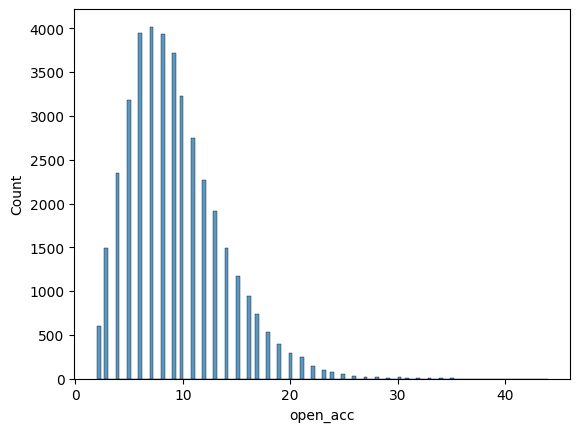

In [55]:
print(df1.open_acc.describe())
sns.boxplot(df1.open_acc)
plt.show()
sns.histplot(df1.open_acc)
plt.show()

### Analysis on column-30 (mths_since_last_record) and column-32 (pub_rec)
#### Attribute description: The number of months since the last public record & Number of derogatory public records 

#### Observations:
> 1. When there has been 0 number of derogatory public records for a borrower then for that borrower month since last record is NA
> 2. We have will analyse both these attributes together to get a full picture if derogatory public records have any impact on default

In [56]:
df1[df1.mths_since_last_record.isna()]['pub_rec'].unique()

array([0], dtype=int64)

### Columns that doesn't add much value from analysis point of view

initial_list_status<br>
collections_12_mths_ex_med<br>
policy_code<br>
application_type<br>
acc_now_delinq<br>
chargeoff_within_12_mths<br>
delinq_amnt<br>
tax_liens<br>

In [57]:
col_list = ['initial_list_status',
'collections_12_mths_ex_med',
'policy_code',
'application_type',
'acc_now_delinq',
'chargeoff_within_12_mths',
'delinq_amnt',
'tax_liens']

for i in col_list:
    print(f'unique values in atribute {i} are : {df1[i].unique()}')
    
# dropping columns

df1.drop(columns=col_list, inplace=True)

unique values in atribute initial_list_status are : ['f']
unique values in atribute collections_12_mths_ex_med are : [ 0. nan]
unique values in atribute policy_code are : [1]
unique values in atribute application_type are : ['INDIVIDUAL']
unique values in atribute acc_now_delinq are : [0]
unique values in atribute chargeoff_within_12_mths are : [ 0. nan]
unique values in atribute delinq_amnt are : [0]
unique values in atribute tax_liens are : [ 0. nan]


### Analysis on column-33 (revol_bal)
#### Attribute description: Total credit revolving balance

#### Observations:
> 1. Highly skewed data toward right


In [58]:
df1.revol_bal.describe()

count    39717.00
mean     13382.53
std      15885.02
min          0.00
25%       3703.00
50%       8850.00
75%      17058.00
max     149588.00
Name: revol_bal, dtype: float64

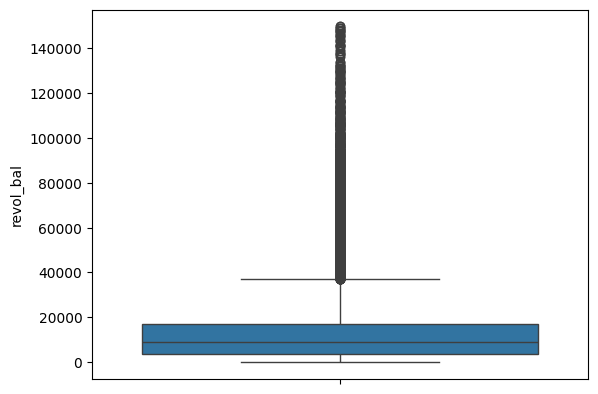

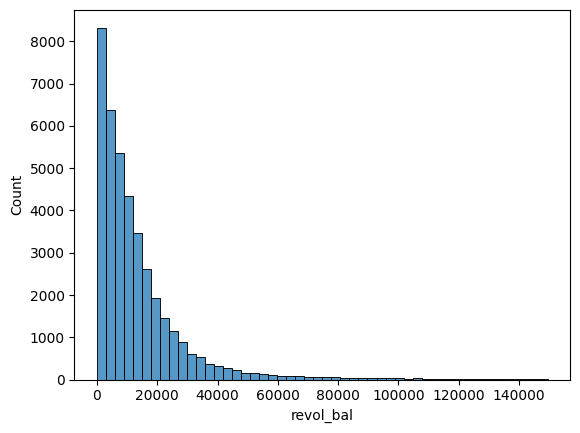

In [59]:
sns.boxplot(df1.revol_bal)
plt.show()
sns.histplot(df1.revol_bal, bins = 50)
plt.show()

### Analysis on column-34 revol_util
#### Attribute description: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

#### Observations:
> 1. revol_util is of type object, we will create another column called revol_util_pct, in this column will store the percentage as floating point number and conduct further analysis on this new attribute
> 2. Except for the cases where we have 0% utilization, the rest of the distribution is quite uniform
> 3. There are 50 occurance where revolving utilization is null, we can fill these nulls with 0 as it is the most occuring value

In [60]:
print(df1.revol_util.isna().sum())
print('\n')
print(df1.revol_util.describe())

50


count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object


In [61]:
df1.loc[df1.revol_util.isna(),'revol_util'] = '0%'

In [62]:
df1.revol_util.describe()

count     39717
unique     1089
top          0%
freq       1027
Name: revol_util, dtype: object

In [63]:
df1['revol_util_pct'] = df1['revol_util'].str.rstrip('%').astype(float)
df1['revol_util_pct'].describe()


count   39717.00
mean       48.77
std        28.37
min         0.00
25%        25.30
50%        49.20
75%        72.30
max        99.90
Name: revol_util_pct, dtype: float64

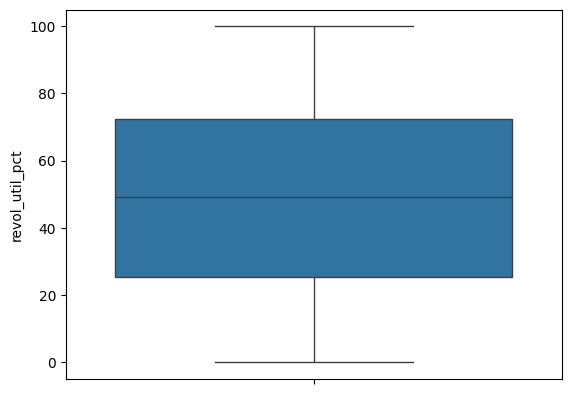

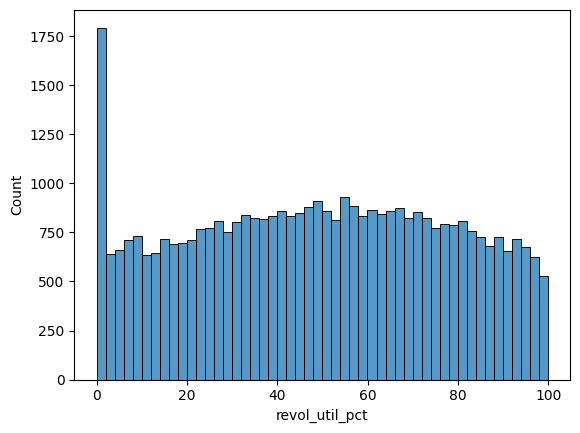

In [64]:
sns.boxplot(df1.revol_util_pct)
plt.show()
sns.histplot(df1.revol_util_pct, bins = 50)
plt.show()

### Analysis on column-31 (total_acc)
#### Attribute description: The total number of credit lines currently in the borrower's credit file

#### Observations:
> 1. Distribution of open account is skwed toward the right, showing that there are outliers, baring the outlier the remaining data is fairly normaly distributed

count   39717.00
mean       22.09
std        11.40
min         2.00
25%        13.00
50%        20.00
75%        29.00
max        90.00
Name: total_acc, dtype: float64


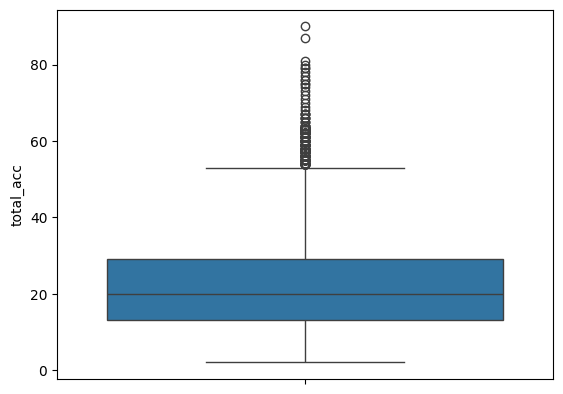

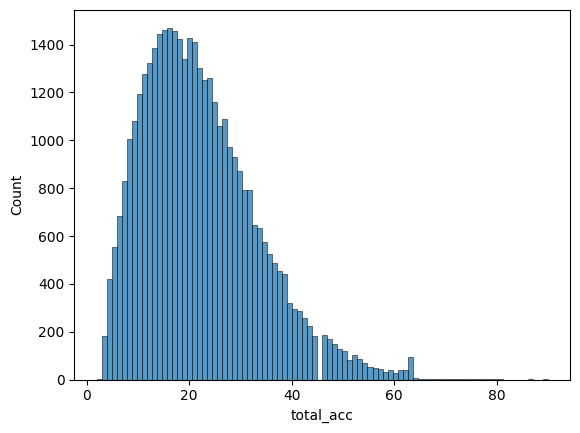

In [65]:
print(df1.total_acc.describe())
sns.boxplot(df1.total_acc)
plt.show()
sns.histplot(df1.total_acc, bins = 90)
plt.show()

In [66]:
df1.total_acc.value_counts()

total_acc
16    1471
15    1462
17    1457
14    1445
20    1428
      ... 
74       1
77       1
78       1
87       1
90       1
Name: count, Length: 82, dtype: int64

#### Column 37 (out_prncp): Remaining outstanding principal for total amount funded

#### Column 38 (out_prncp_inv): Remaining outstanding principal for portion of total amount funded by investors

#### Column 39 (total_pymnt): Payments received to date for total amount funded

#### Column 40 (total_pymnt_inv): Payments received to date for portion of total amount funded by investors

#### Column 41 (total_rec_prncp): Principal received to date

#### Column 42 (total_rec_int): Interest received to date

#### Column 43 (total_rec_late_fee): Late fees received to date

#### Column 44 (recoveries): post charge off gross recovery

#### Column 45 (collection_recovery_fee): post charge off collection fee

#### Column 47 (last_pymnt_amnt): Last total payment amount received

These Attributes may help us quantify the amount of loss in case of a default when used along with funded amount data, however
these attribute doesn't add toward the driving factor of a default

Likewise the following attribute doesn't add much value in being a driving factor for default:

#### Column 46 (last_pymnt_d): Last month payment was received

#### Column 49 (last_credit_pull_d): The most recent month LC pulled credit for this loan

We will not remove these columns for now from our analsis, we will see if these can be of any use during our bivariant analysis.

### Analysis on column-106 (pub_rec_bankruptcies)
#### Attribute description: Number of public record bankruptcies

#### Observations:
> 1. For 697 records this attribute is null, we will replace the null value with 0 which is also the mode for this data
> 2. Less then 5% of borrower has 1 occurance of public bankruptcies

In [67]:
print(df1.pub_rec_bankruptcies.isna().sum())
print('\n')
print(df1.pub_rec_bankruptcies.value_counts())

697


pub_rec_bankruptcies
0.00    37339
1.00     1674
2.00        7
Name: count, dtype: int64


In [68]:
df1.loc[df1.pub_rec_bankruptcies.isna(),'pub_rec_bankruptcies'] = 0

0


pub_rec_bankruptcies
0.00   95.77
1.00    4.21
2.00    0.02
Name: proportion, dtype: float64


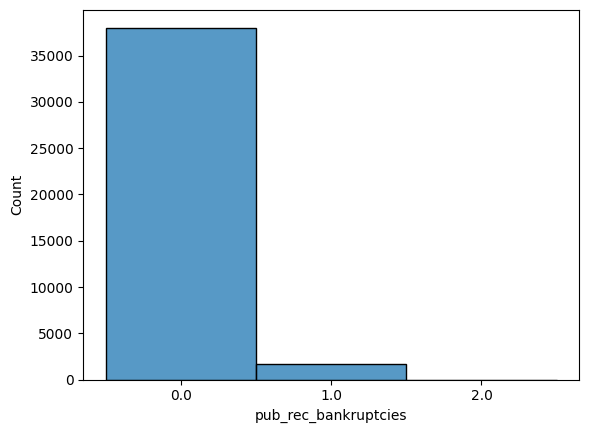

In [69]:
print(df1.pub_rec_bankruptcies.isna().sum())
print('\n')
print(df1.pub_rec_bankruptcies.value_counts(normalize = True) * 100)
sns.histplot(df1.pub_rec_bankruptcies.astype(str))
plt.show()

In [70]:
df1['pub_rec_bankruptcies'].astype(str)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: pub_rec_bankruptcies, Length: 39717, dtype: object

In [71]:
df1.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade  ... last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...             May-16   
1   15.27%        59.83     C        C4  ...             Sep-13   
2   15.96%        84.33     C        C5  ...             May-16   
3   13.49%       339.31     C        C1  ...             Apr-16   
4   12.69%        67.79     B        B5  ...             May-16   

  pub_rec_bankruptcies  int_rate_pct int_rate_cat issue_yr issue_mnt  \
0                 0.00         10.65       Medium     2011       Dec   
1                 0.00         15.27         High     2011       Dec   
2                 0.00         15.96         High     2011       Dec   
3                 0.00         13.49  Medium High     2011       Dec   
4                 0.00         12.69  Medium High     2011       Dec   

  earliest_crl_mnt earliest_crl_yr crl_duration  revol_util_pct  
0              Jan            1985           26           83.70  
1              Apr            1999           12            9.40  
2              Nov            2001           10           98.50  
3              Feb            1996           15           21.00  
4              Jan            1996           15           53.90  

[5 rows x 50 columns]

In [72]:
# id, member_id, out_prncp, out_prncp_inv doesn't add any value to our analysis hence we will drop these columns
# we have created another attibute int_rate_pct and revol_util 
# which is a floating point value and hence int_rate and revol_util is reduandant

df1 = df1.drop(columns = ['id', 'member_id', 'out_prncp', 'out_prncp_inv','int_rate','revol_util'])

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   installment              39717 non-null  float64
 5   grade                    39717 non-null  object 
 6   sub_grade                39717 non-null  object 
 7   emp_length               39717 non-null  object 
 8   home_ownership           39717 non-null  object 
 9   annual_inc               39717 non-null  float64
 10  verification_status      39717 non-null  object 
 11  issue_d                  39717 non-null  object 
 12  loan_status              39717 non-null  object 
 13  purpose                  39717 non-null  object 
 14  zip_code              

#### Following are the attribute which represent date or its derivatives:
1. issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d, issue_yr, issue_mnt, earliest_crl_mnt, earliest_crl_yr

#### Following attribute are Numeric columns
2. loan_amnt, funded_amnt, funded_amnt_inv, installment, annual_inc, dti, revol_bal, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_amnt, pub_rec_bankruptcies, int_rate_pct, crl_duration, revol_util_pct

#### Following are the Categorical attributes
3. term, grade, sub_grade, emp_length, home_ownership, verification_status, loan_status, purpose, zip_code, addr_state, delinq_2yrs, inq_last_6mths, mths_since_last_record, open_acc, pub_rec, total_acc, int_rate_cat



In [74]:
date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'issue_yr',
        'issue_mnt', 'earliest_crl_mnt', 'earliest_crl_yr']

fact = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'revol_bal',
        'pub_rec_bankruptcies', 'int_rate_pct', 'crl_duration',        'revol_util_pct']

pay_amt = ['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
        'collection_recovery_fee', 'last_pymnt_amnt']

cat = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_record', 'open_acc', 'pub_rec', 
       'total_acc', 'int_rate_cat']

In [75]:
df1[date].head()

issue_d earliest_cr_line last_pymnt_d last_credit_pull_d issue_yr issue_mnt  \
0  Dec-11           Jan-85       Jan-15             May-16     2011       Dec   
1  Dec-11           Apr-99       Apr-13             Sep-13     2011       Dec   
2  Dec-11           Nov-01       Jun-14             May-16     2011       Dec   
3  Dec-11           Feb-96       Jan-15             Apr-16     2011       Dec   
4  Dec-11           Jan-96       May-16             May-16     2011       Dec   

  earliest_crl_mnt  earliest_crl_yr  
0              Jan             1985  
1              Apr             1999  
2              Nov             2001  
3              Feb             1996  
4              Jan             1996

In [76]:
df1[fact].head()

loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc   dti  \
0       5000         5000          4975.00       162.87    24000.00 27.65   
1       2500         2500          2500.00        59.83    30000.00  1.00   
2       2400         2400          2400.00        84.33    12252.00  8.72   
3      10000        10000         10000.00       339.31    49200.00 20.00   
4       3000         3000          3000.00        67.79    80000.00 17.94   

   revol_bal  pub_rec_bankruptcies  int_rate_pct  crl_duration  revol_util_pct  
0      13648                  0.00         10.65            26           83.70  
1       1687                  0.00         15.27            12            9.40  
2       2956                  0.00         15.96            10           98.50  
3       5598                  0.00         13.49            15           21.00  
4      27783                  0.00         12.69            15           53.90

In [77]:
df1[cat].head()

term grade sub_grade emp_length home_ownership verification_status  \
0   36 months     B        B2  10+ years           RENT            Verified   
1   60 months     C        C4   < 1 year           RENT     Source Verified   
2   36 months     C        C5  10+ years           RENT        Not Verified   
3   36 months     C        C1  10+ years           RENT     Source Verified   
4   60 months     B        B5     1 year           RENT     Source Verified   

   loan_status         purpose zip_code addr_state  delinq_2yrs  \
0   Fully Paid     credit_card    860xx         AZ            0   
1  Charged Off             car    309xx         GA            0   
2   Fully Paid  small_business    606xx         IL            0   
3   Fully Paid           other    917xx         CA            0   
4      Current           other    972xx         OR            0   

   inq_last_6mths  mths_since_last_record  open_acc  pub_rec  total_acc  \
0               1                     NaN         3        0          9   
1               5                     NaN         3        0          4   
2               2                     NaN         2        0         10   
3               1                     NaN        10        0         37   
4               0                     NaN        15        0         38   

  int_rate_cat  
0       Medium  
1         High  
2         High  
3  Medium High  
4  Medium High

### Data Segration based on paid off and default
#### Observation
> 1. From the below heatmap we couldn't identify any attribute that shows a strong positive or negative correlation with default

In [78]:
df1['Defaulted'] = df1['loan_status'].apply(lambda x : 1 if x == 'Charged Off' else 0)
fully_paid = df1[df1['loan_status'] == 'Fully Paid']
Defaulted = df1[df1['loan_status'] == 'Charged Off']

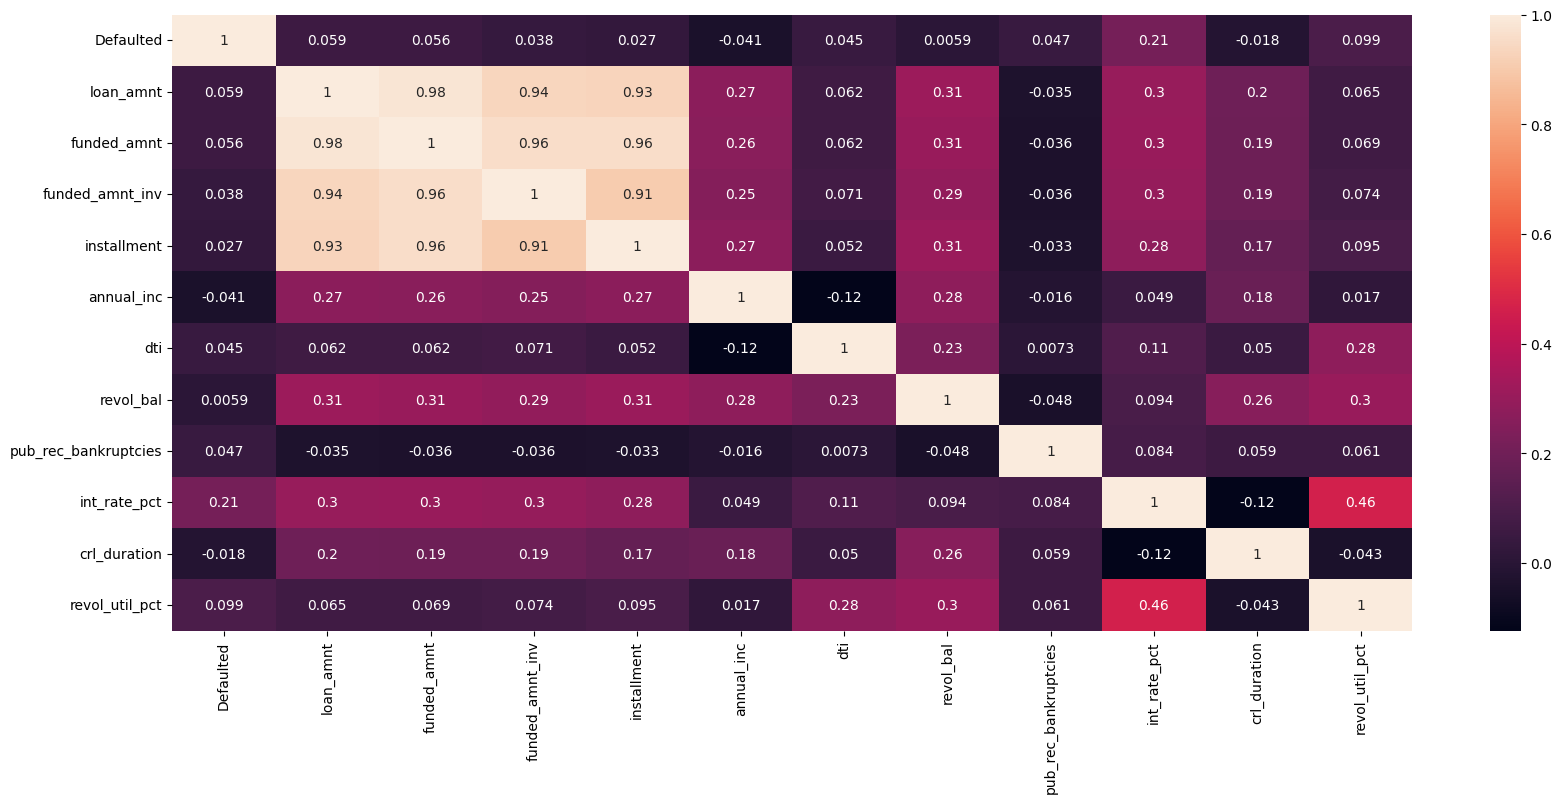

In [79]:
df1 = df1[~(df1['loan_status'] == 'Current')] # removing rows where loan is still active
fig, ax = plt.subplots(1,1, figsize = (20,8))

# checking correlation between defaulted status and various other facts

cols = ['Defaulted', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'revol_bal',
        'pub_rec_bankruptcies', 'int_rate_pct', 'crl_duration',        'revol_util_pct']
sns.heatmap(df1[cols].corr(), annot = True )
plt.show()

## 4. Bivariate Analysis

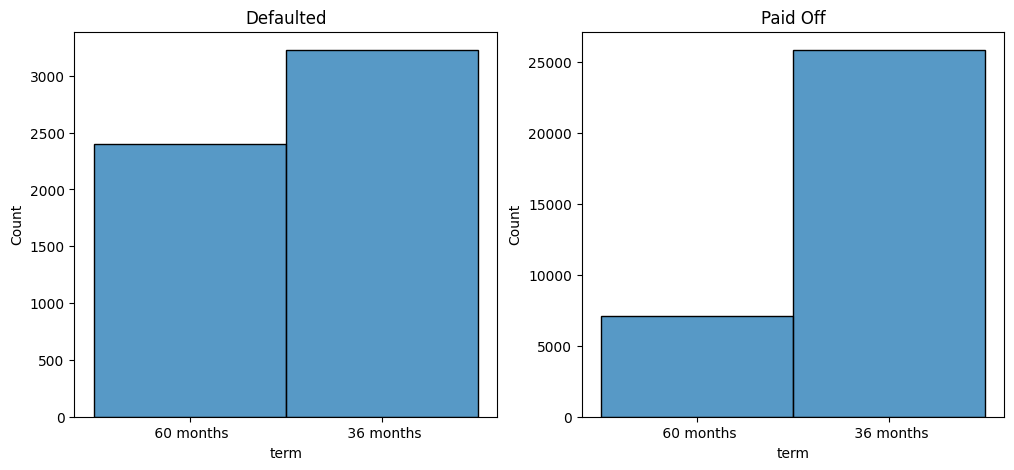

In [80]:
# analyse the relation between dafult and term of a loan
fig, ax = plt.subplots(1,2,sharex=True, figsize = (12,5))
sns.histplot(Defaulted.term, ax = ax[0]).set(title = 'Defaulted')
sns.histplot(fully_paid.term, ax = ax[1]).set(title = 'Paid Off')
plt.show()

#Observation
# 1. Among the defaulter there were significantly more number of long term loans compared to the fully paid one

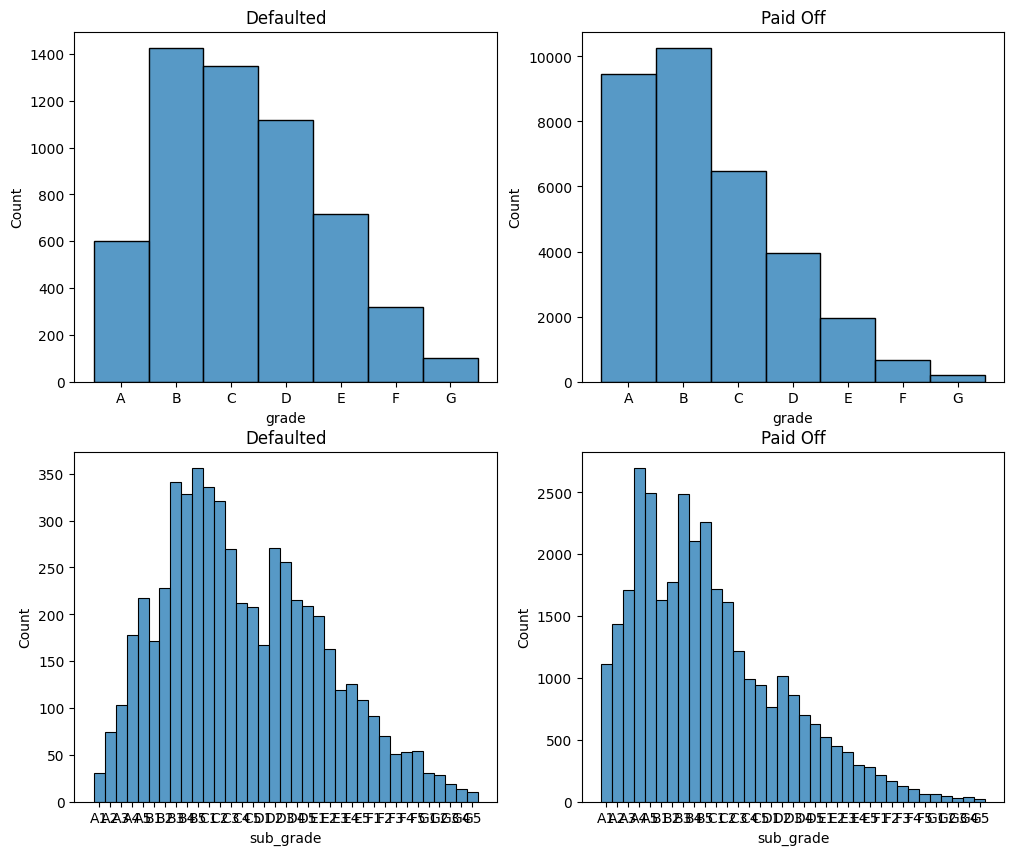

In [81]:
# analyse the relation between dafult and grade of a loan
fig, ax = plt.subplots(2,2,sharex=False, figsize = (12,10))
sns.histplot(Defaulted.grade.sort_values(), ax = ax[0,0]).set(title = 'Defaulted')
sns.histplot(fully_paid.grade.sort_values(), ax = ax[0,1]).set(title = 'Paid Off')

sns.histplot(Defaulted.sub_grade.sort_values(), ax = ax[1,0]).set(title = 'Defaulted')
sns.histplot(fully_paid.sub_grade.sort_values(), ax = ax[1,1]).set(title = 'Paid Off')

plt.show()

#Observation
# 1. Among the defaulter there were significantly more number of credits with grade D, E, F and G

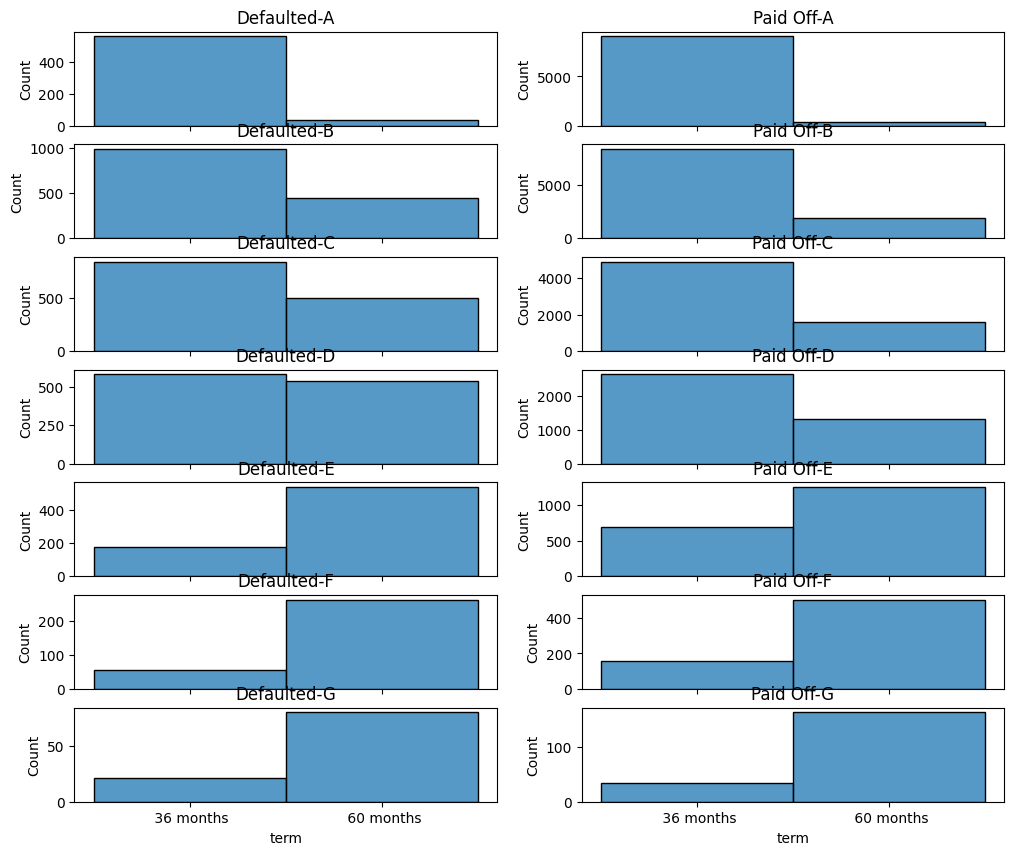

In [82]:
# Analysing Term of the loan across various grade for defaulted and paid loan

grade = ['A','B','C','D','E','F','G']
fig, ax = plt.subplots(7,2,sharex=True, figsize = (12,10))
i=0
for grd in grade:
    sns.histplot(Defaulted[Defaulted['grade'] == grd].term, ax = ax[i,0]).set(title = 'Defaulted-'+grd)
    sns.histplot(fully_paid[fully_paid['grade'] == grd].term, ax = ax[i,1]).set(title = 'Paid Off-'+grd)
    i=i+1
plt.show()

#Observation:
    # 1. From the above two analysis we have identifed that long term loan has higher probablity of default and also 
    #    the loan with poor rating has higher probablity of default
    # 2. From the below analysis what we observe is that in both permorming and defaulted portfolio, as we move from A grade
    #    to G grade, more and more number of customers are going for long term loan


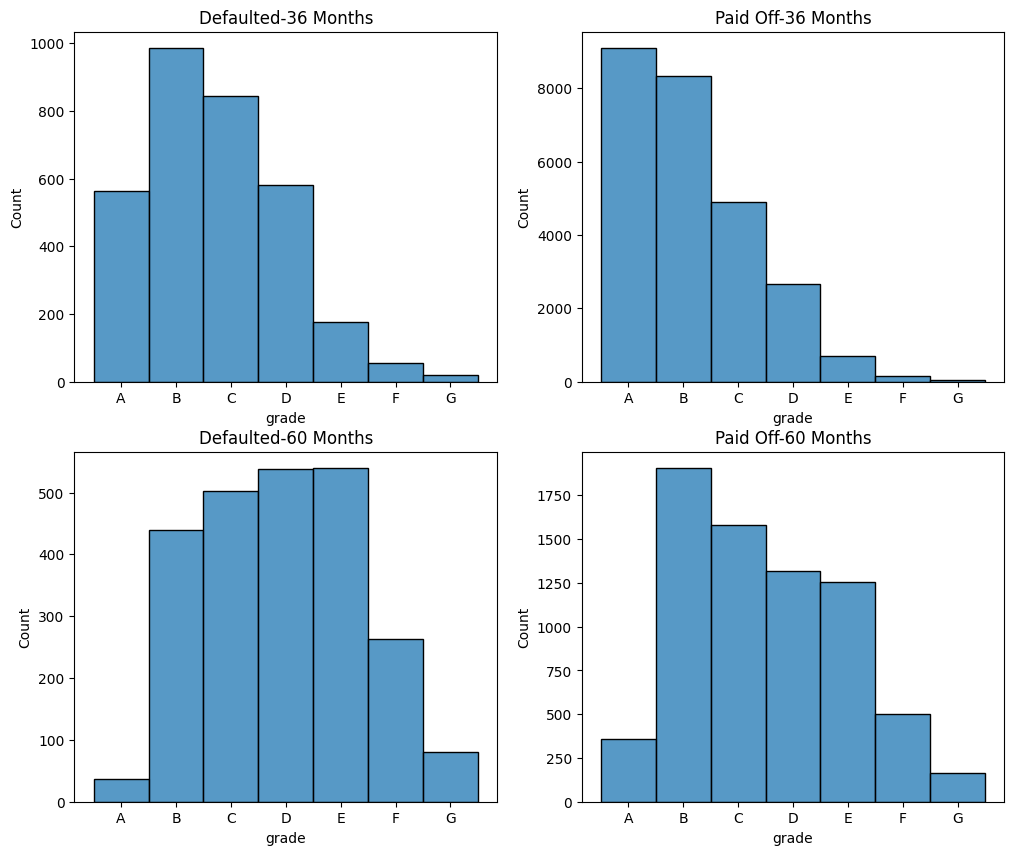

In [83]:
fig, ax = plt.subplots(2,2,sharex=False, figsize = (12,10))
sns.histplot(Defaulted[Defaulted['term'] == ' 36 months'].grade.sort_values(), ax = ax[0,0]).set(title = 'Defaulted-36 Months')
sns.histplot(fully_paid[fully_paid['term'] == ' 36 months'].grade.sort_values(), ax = ax[0,1]).set(title = 'Paid Off-36 Months')
sns.histplot(Defaulted[Defaulted['term'] == ' 60 months'].grade.sort_values(), ax = ax[1,0]).set(title = 'Defaulted-60 Months')
sns.histplot(fully_paid[fully_paid['term'] == ' 60 months'].grade.sort_values(), ax = ax[1,1]).set(title = 'Paid Off-60 Months')
plt.show()

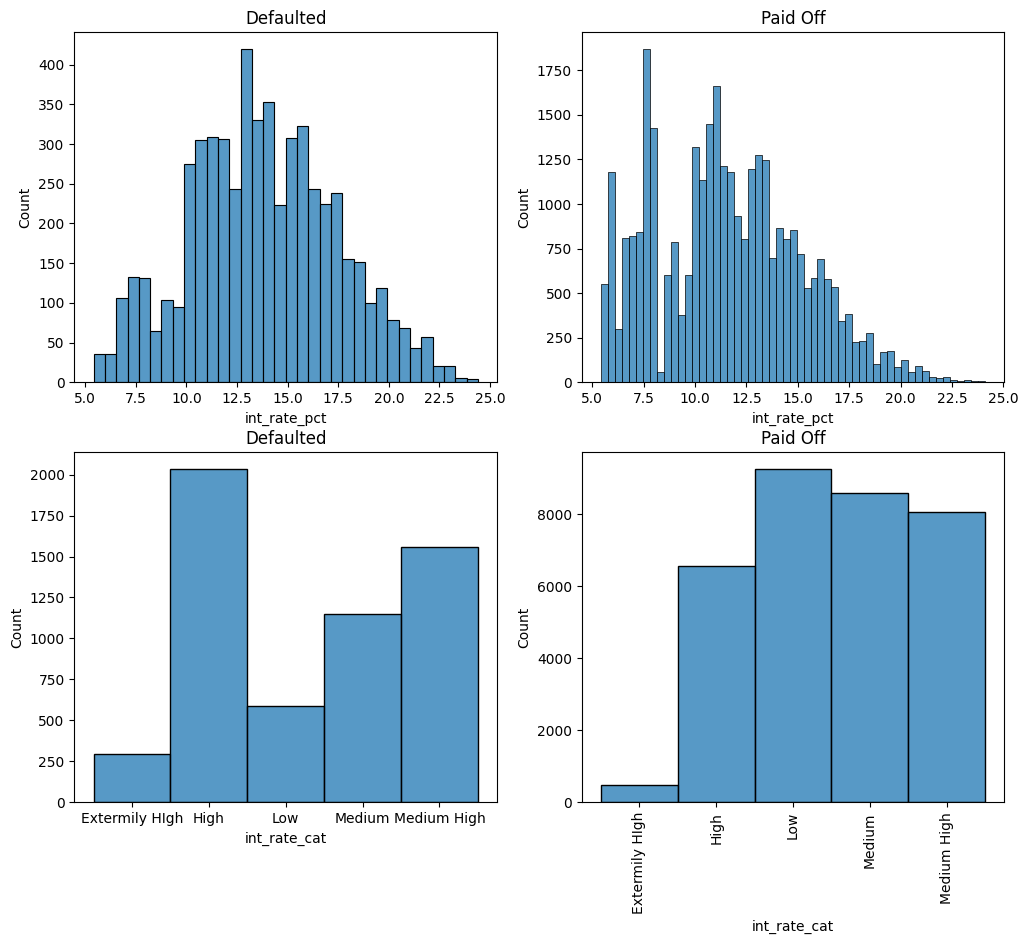

In [84]:
#Distribution of interest rate percentage for defaulted and fully paidoff portfolio

fig, ax = plt.subplots(2,2,sharex=False, figsize = (12,10))
sns.histplot(Defaulted.int_rate_pct, ax = ax[0,0]).set(title = 'Defaulted')
sns.histplot(fully_paid.int_rate_pct, ax = ax[0,1]).set(title = 'Paid Off')
sns.histplot(Defaulted.int_rate_cat.sort_values(), ax = ax[1,0]).set(title = 'Defaulted',)
sns.histplot(fully_paid.int_rate_cat.sort_values(), ax = ax[1,1]).set(title = 'Paid Off')
plt.xticks(rotation=90)
plt.show()

#Observation:
    # 1. Interest rate percentage shows fatter tails for the defaulted portfolio when compared with paid off portfolio
    #    which somewhat implies that higher interest rate may leads to higher probablity of default.
    # 2. Although it may appear that higher interest rate may leads to higher probablity of default, however financial
    #    institutes tends to charge higher interest rate to high risk customers in order to compensate for the increased risk,
    #    and it is these high risk customer which often show high default ratio.
    # 3. Hence intrest rates are not a leading indicator of default


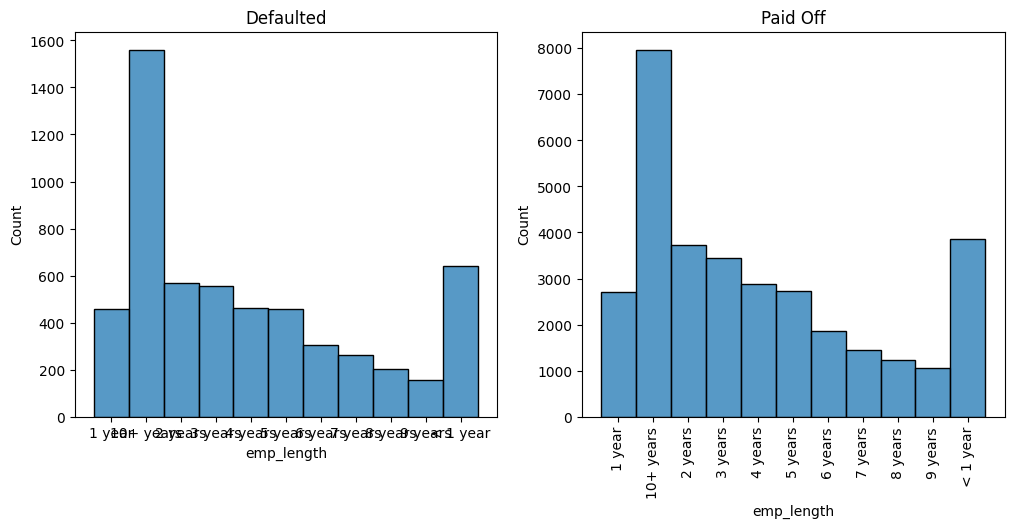

For Defaulted: 
emp_length
10+ years   27.71
< 1 year    11.36
2 years     10.08
3 years      9.86
4 years      8.21
5 years      8.14
1 year       8.10
6 years      5.46
7 years      4.67
8 years      3.61
9 years      2.81
Name: proportion, dtype: float64
For Fully Paid: 
emp_length
10+ years   24.16
< 1 year    11.74
2 years     11.30
3 years     10.49
4 years      8.74
5 years      8.30
1 year       8.23
6 years      5.65
7 years      4.39
8 years      3.74
9 years      3.24
Name: proportion, dtype: float64


In [85]:
# distribution of employement amoung defaulted and paid-off portfolio

fig, ax = plt.subplots(1,2,sharex=False, figsize = (12,5))
sns.histplot(Defaulted.emp_length.sort_values(), ax = ax[0]).set(title = 'Defaulted')
plt.xticks(rotation=90)
sns.histplot(fully_paid.emp_length.sort_values(), ax = ax[1]).set(title = 'Paid Off')
plt.show()

print(f'For Defaulted: \n{Defaulted.emp_length.value_counts(normalize = True)*100}')
print(f'For Fully Paid: \n{fully_paid.emp_length.value_counts(normalize = True)*100}')

# Distribution of employement length is similar across defaulted and paid off portfolio and hence it is not a 
# distinguishable factor for default


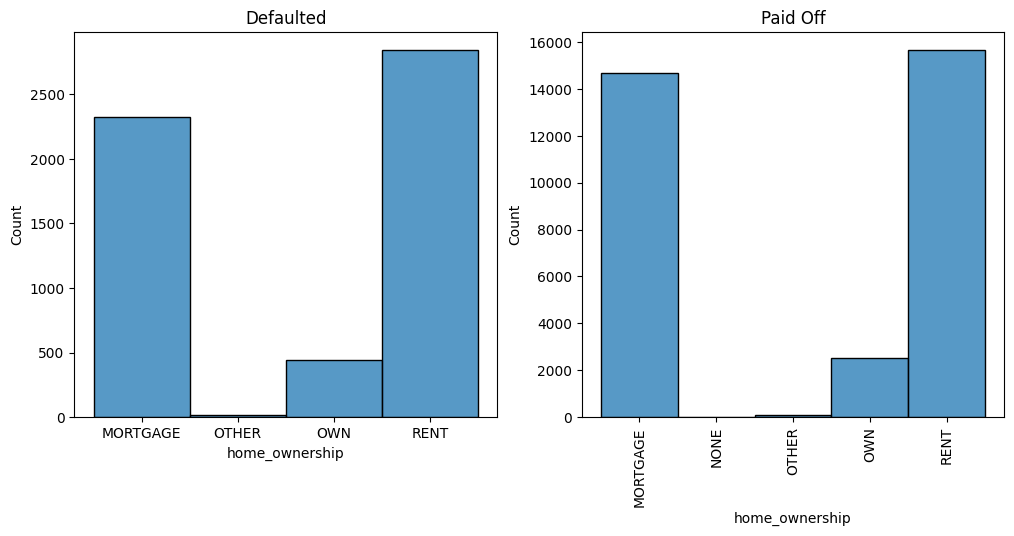

For Defaulted: 
home_ownership
RENT       50.45
MORTGAGE   41.35
OWN         7.87
OTHER       0.32
Name: proportion, dtype: float64
For Fully Paid: 
home_ownership
RENT       47.47
MORTGAGE   44.59
OWN         7.68
OTHER       0.24
NONE        0.01
Name: proportion, dtype: float64


In [86]:
# Distribution of home ownership across default and non default
fig, ax = plt.subplots(1,2,sharex=False, figsize = (12,5))
sns.histplot(Defaulted.home_ownership.sort_values(), ax = ax[0]).set(title = 'Defaulted')
plt.xticks(rotation=90)
sns.histplot(fully_paid.home_ownership.sort_values(), ax = ax[1]).set(title = 'Paid Off')
plt.show()

print(f'For Defaulted: \n{Defaulted.home_ownership.value_counts(normalize = True)*100}')
print(f'For Fully Paid: \n{fully_paid.home_ownership.value_counts(normalize = True)*100}')

# Distribution of home ownership is similar across defaulted and paid off portfolio and hence it is not a 
# distinguishable factor for default

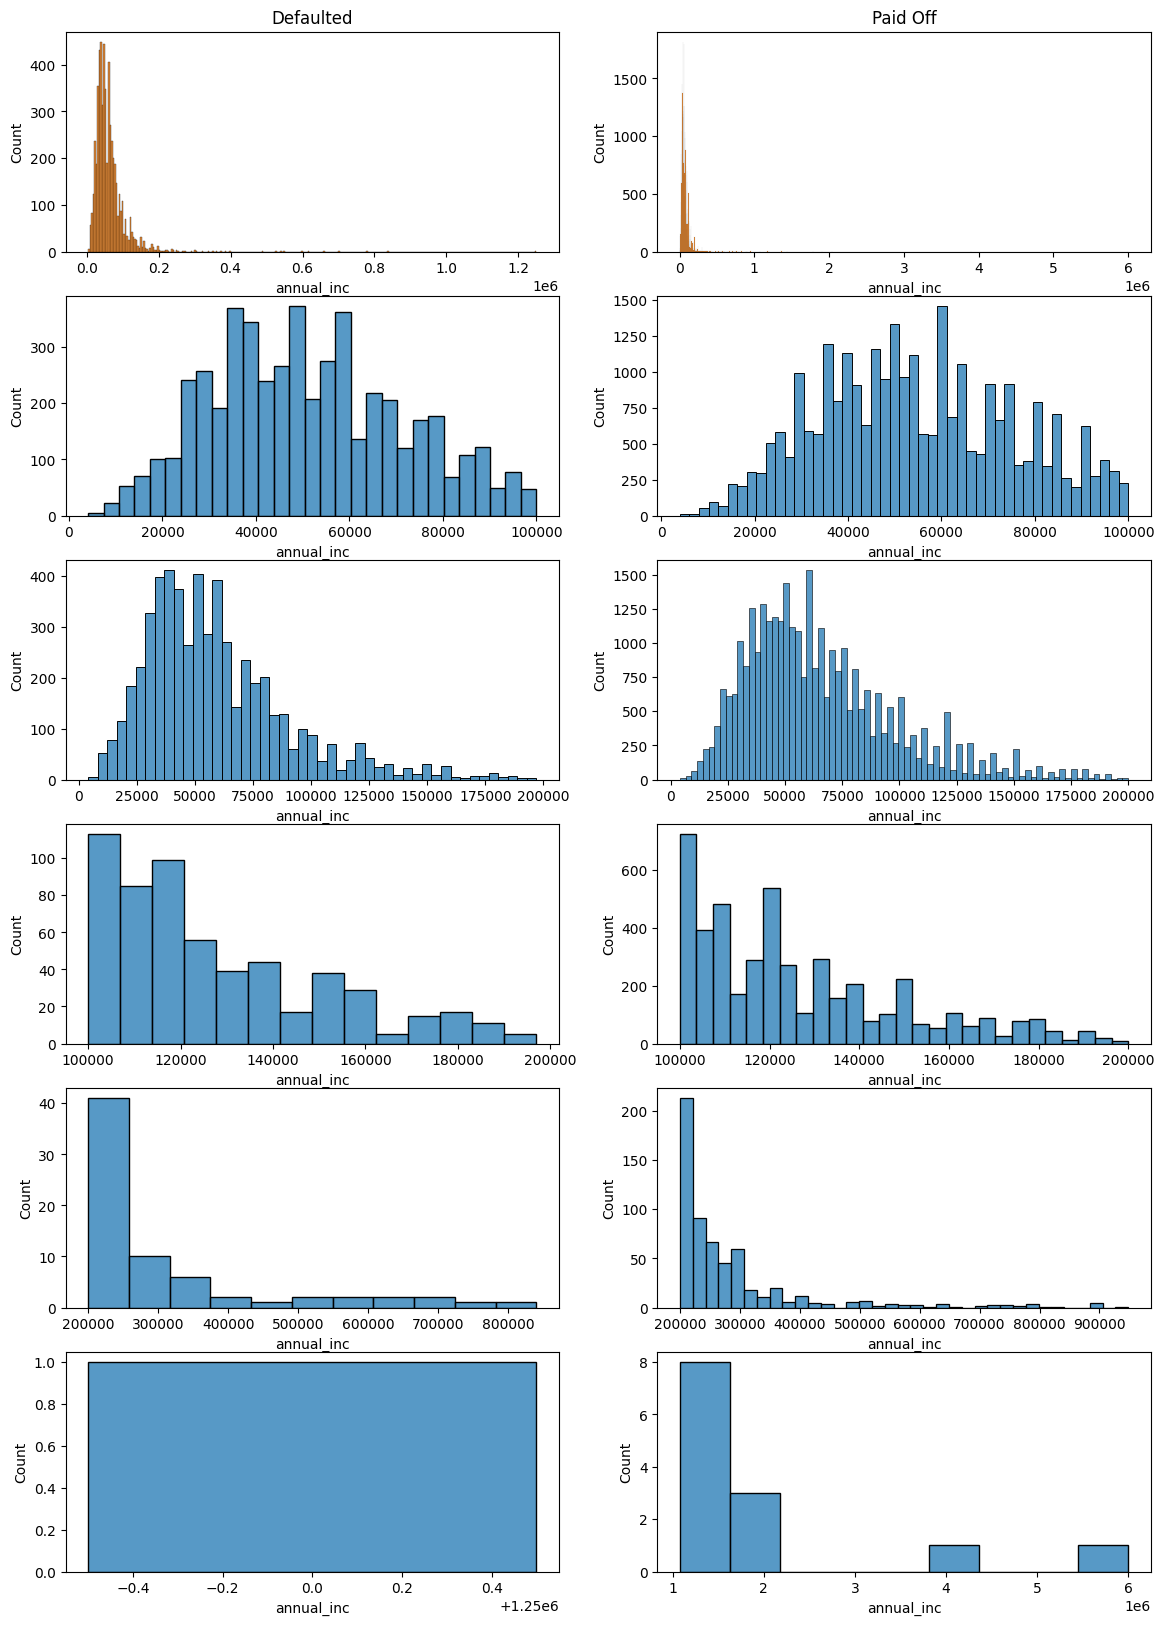

In [87]:
#Distribution of annual income for defaulted and fully paid off portfolio

fig, ax = plt.subplots(6,2,sharex=False, figsize = (14,20))
sns.histplot(Defaulted.annual_inc, ax = ax[0,0]).set(title = 'Defaulted')
sns.histplot(fully_paid.annual_inc, ax = ax[0,1]).set(title = 'Paid Off')
def_cond1 = Defaulted.annual_inc < 100000
pf_cond1 = fully_paid.annual_inc < 100000
def_cond2 = Defaulted.annual_inc < 200000
pf_cond2 = fully_paid.annual_inc < 200000
def_cond3 = (Defaulted.annual_inc >= 100000) & (Defaulted.annual_inc < 200000)
pf_cond3 = (fully_paid.annual_inc >= 100000) & (fully_paid.annual_inc < 200000)
def_cond4 = (Defaulted.annual_inc >= 200000) & (Defaulted.annual_inc < 1000000)
pf_cond4 = (fully_paid.annual_inc >= 200000) & (fully_paid.annual_inc < 1000000)
def_cond5 = Defaulted.annual_inc >= 1000000
pf_cond5 = fully_paid.annual_inc >= 1000000

sns.histplot(Defaulted.annual_inc, ax = ax[0,0]).set(title = 'Defaulted')
sns.histplot(fully_paid.annual_inc, ax = ax[0,1]).set(title = 'Paid Off')
sns.histplot(Defaulted[def_cond1].annual_inc, ax = ax[1,0])#.set(title = 'Defaulted')
sns.histplot(fully_paid[pf_cond1].annual_inc, ax = ax[1,1])#.set(title = 'Paid Off')
sns.histplot(Defaulted[def_cond2].annual_inc, ax = ax[2,0])#.set(title = 'Defaulted')
sns.histplot(fully_paid[pf_cond2].annual_inc, ax = ax[2,1])#.set(title = 'Paid Off')
sns.histplot(Defaulted[def_cond3].annual_inc, ax = ax[3,0])#.set(title = 'Defaulted')
sns.histplot(fully_paid[pf_cond3].annual_inc, ax = ax[3,1])#.set(title = 'Paid Off')
sns.histplot(Defaulted[def_cond4].annual_inc, ax = ax[4,0])#.set(title = 'Defaulted')
sns.histplot(fully_paid[pf_cond4].annual_inc, ax = ax[4,1])#.set(title = 'Paid Off')
sns.histplot(Defaulted[def_cond5].annual_inc, ax = ax[5,0])#.set(title = 'Defaulted')
sns.histplot(fully_paid[pf_cond5].annual_inc, ax = ax[5,1])#.set(title = 'Paid Off')

plt.show()

# Observation:
    # Distribution of annual income is similar across defaulted and paid off portfolio and hence it is not a 
    # distinguishable factor for default

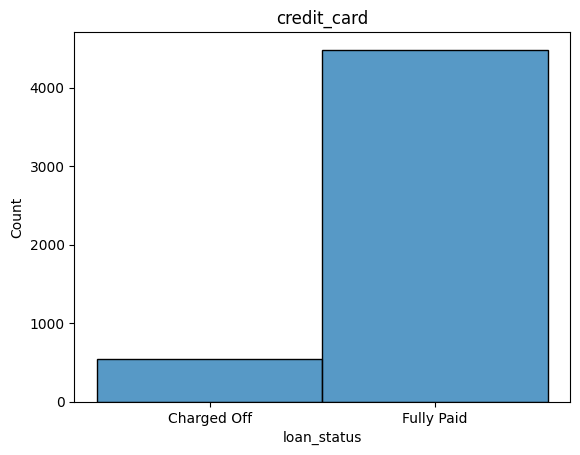

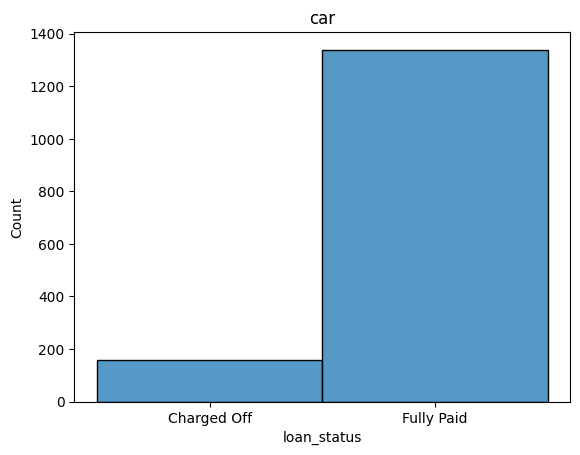

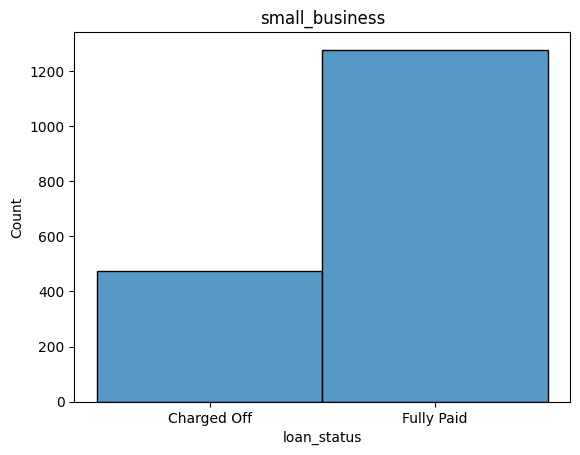

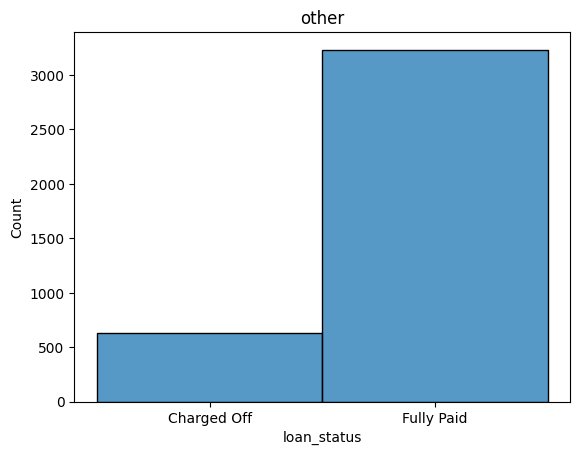

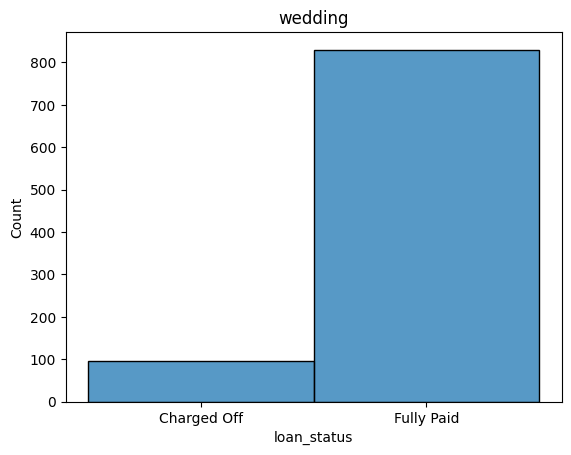

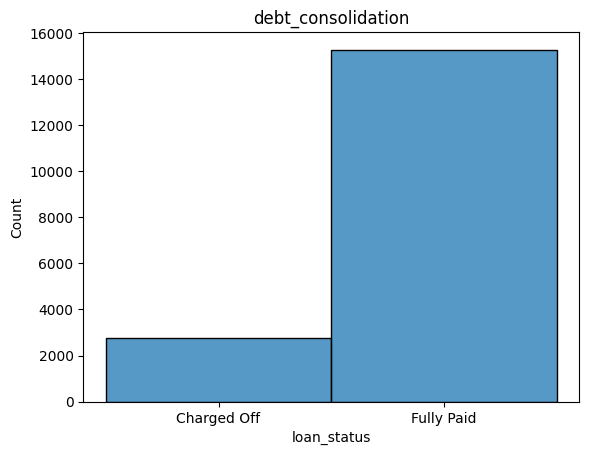

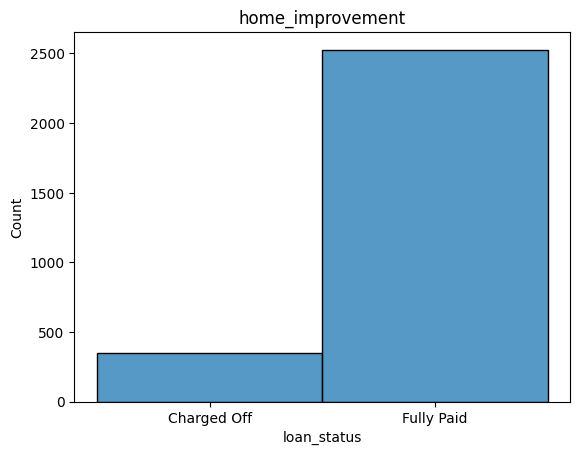

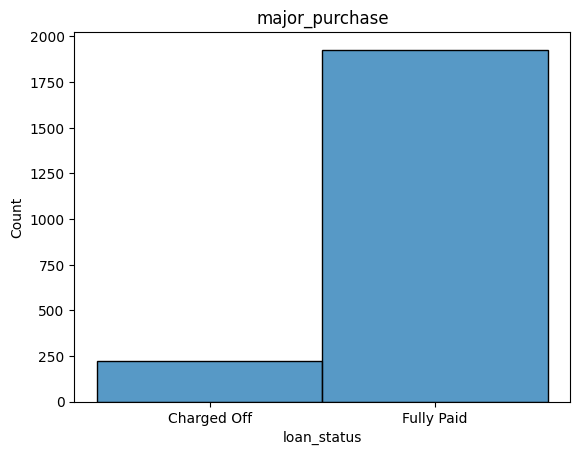

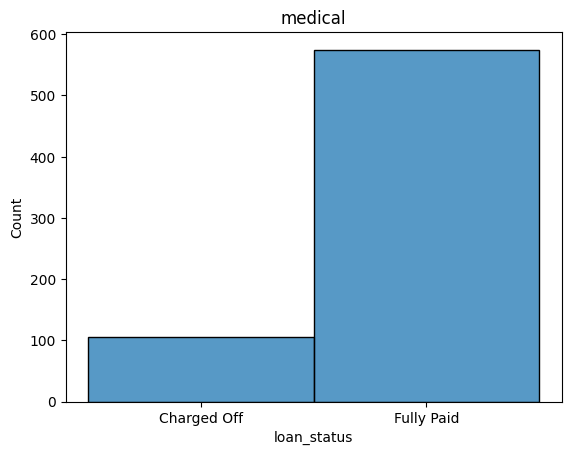

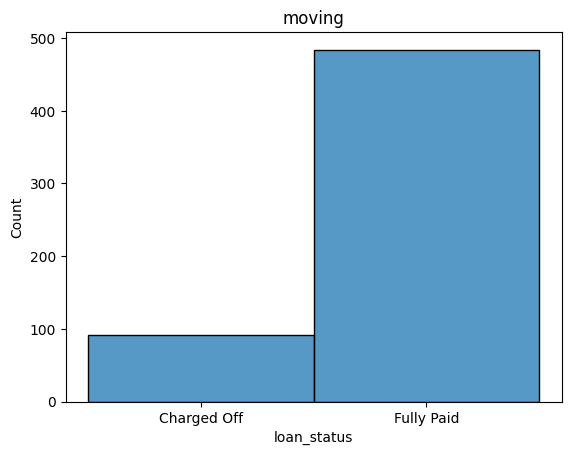

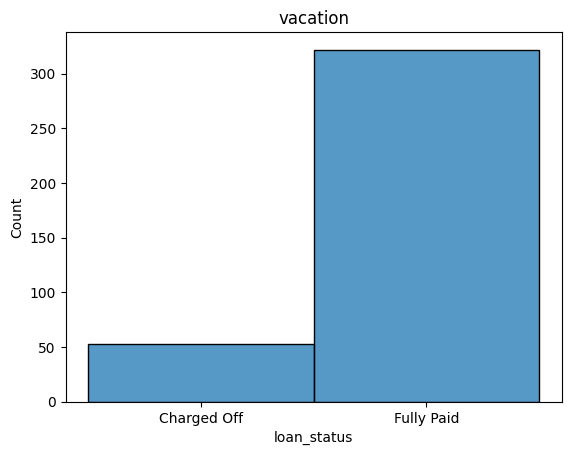

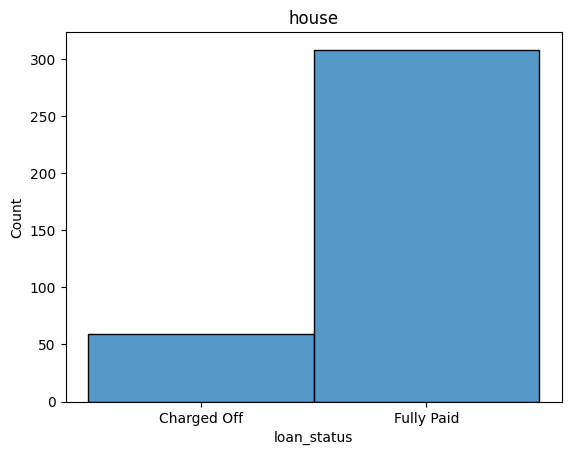

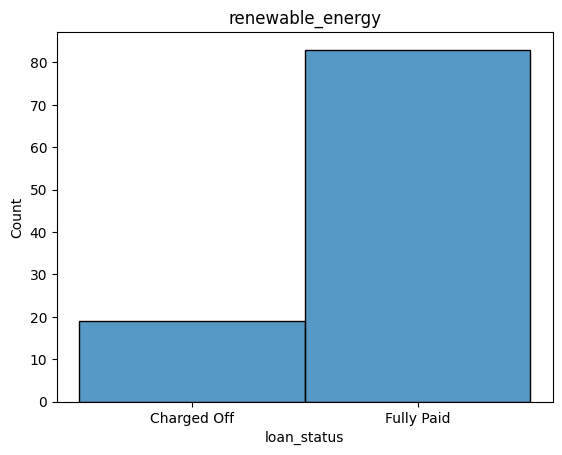

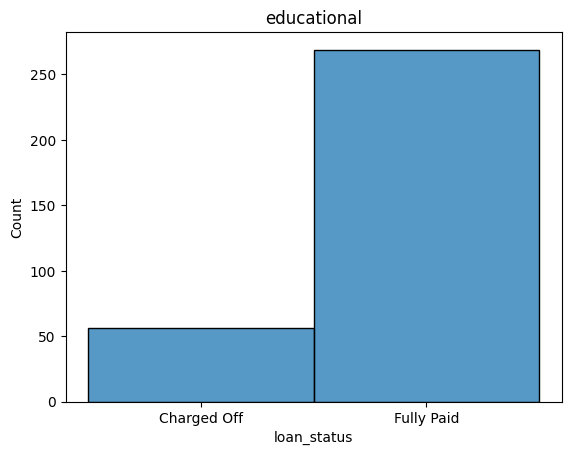

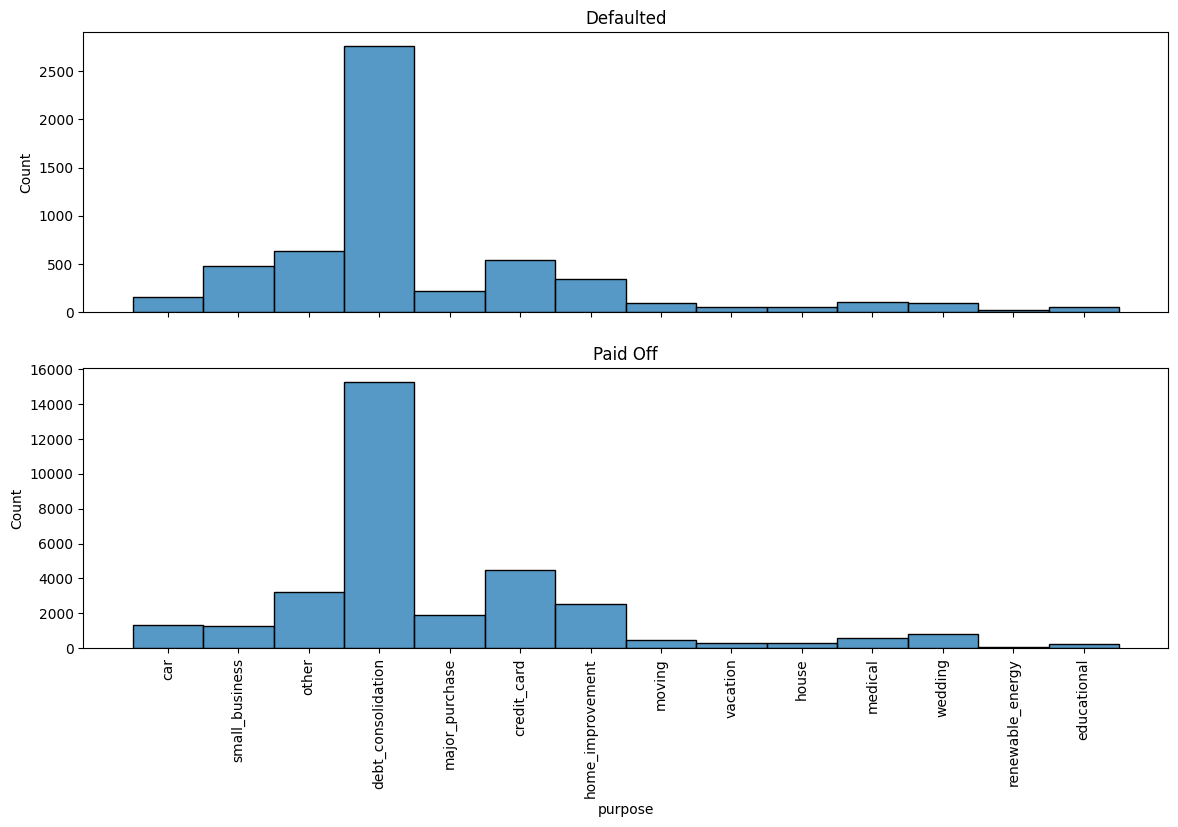

Distribution of charged off vs fully paid for loan assigned to credit_card:
loan_status
Fully Paid    89.22
Charged Off   10.78
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for loan assigned to car:
loan_status
Fully Paid    89.33
Charged Off   10.67
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for loan assigned to small_business:
loan_status
Fully Paid    72.92
Charged Off   27.08
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for loan assigned to other:
loan_status
Fully Paid    83.62
Charged Off   16.38
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for loan assigned to wedding:
loan_status
Fully Paid    89.63
Charged Off   10.37
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for loan assigned to debt_consolidation:
loan_status
Fully Paid    84.67
Charged Off   15.33
Name: proportion, dtype: float64

Distribution of charged off vs fully

In [88]:
# investigating the purpose of loan
for purpose in df1.purpose.unique():
    sns.histplot(df1[df1.purpose == purpose].loan_status.sort_values()).set(title = purpose)
    plt.show()

fig, ax = plt.subplots(2,1,sharex=True, figsize = (14,8))
sns.histplot(Defaulted.purpose, ax = ax[0]).set(title = 'Defaulted')
sns.histplot(fully_paid.purpose, ax = ax[1]).set(title = 'Paid Off')
plt.xticks(rotation=90)
plt.show()

for purp in df1.purpose.unique():
    dist = df1[df1.purpose == purp].loan_status.value_counts(normalize = True) * 100
    print(f'Distribution of charged off vs fully paid for loan assigned to {purp}:\n{dist}\n')
    
#Observation:
        # Small businesses loan shows the heighest default of 27%
        # Other than small businesses renewable energy and educational loan shows a relativly higher percentage of default,
        # however not as high as small businesses loan

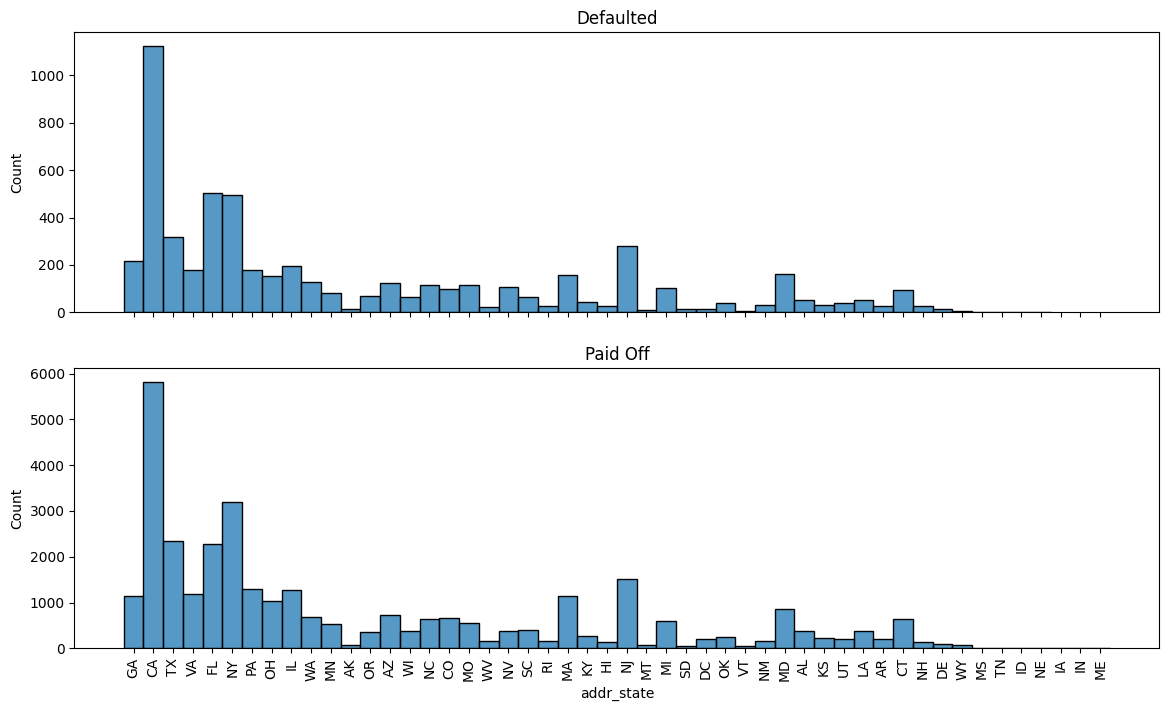

Distribution of charged off vs fully paid for state AZ:
loan_status
Fully Paid    85.51
Charged Off   14.49
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for state GA:
loan_status
Fully Paid    84.18
Charged Off   15.82
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for state IL:
loan_status
Fully Paid    86.67
Charged Off   13.33
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for state CA:
loan_status
Fully Paid    83.81
Charged Off   16.19
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for state NC:
loan_status
Fully Paid    84.80
Charged Off   15.20
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for state TX:
loan_status
Fully Paid    88.12
Charged Off   11.88
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for state VA:
loan_status
Fully Paid    87.07
Charged Off   12.93
Name: proportion, dtype: float64

Distri

In [89]:
# Investigation by area
df1.addr_state.unique()
fig, ax = plt.subplots(2,1,sharex=True, figsize = (14,8))
sns.histplot(Defaulted.addr_state, ax = ax[0]).set(title = 'Defaulted')
sns.histplot(fully_paid.addr_state, ax = ax[1]).set(title = 'Paid Off')
plt.xticks(rotation=90)
plt.show()

for state in df1.addr_state.unique():
    dist = df1[df1.addr_state == state].loan_status.value_counts(normalize = True) * 100
    print(f'Distribution of charged off vs fully paid for state {state}:\n{dist}\n')
    
# Observation:
    # Among all the states MO, FL, NV, AK, SD, NE shows a higher default percentage
    # Of which NV and NE has the heighest default ratio of 22% and 40% respectively

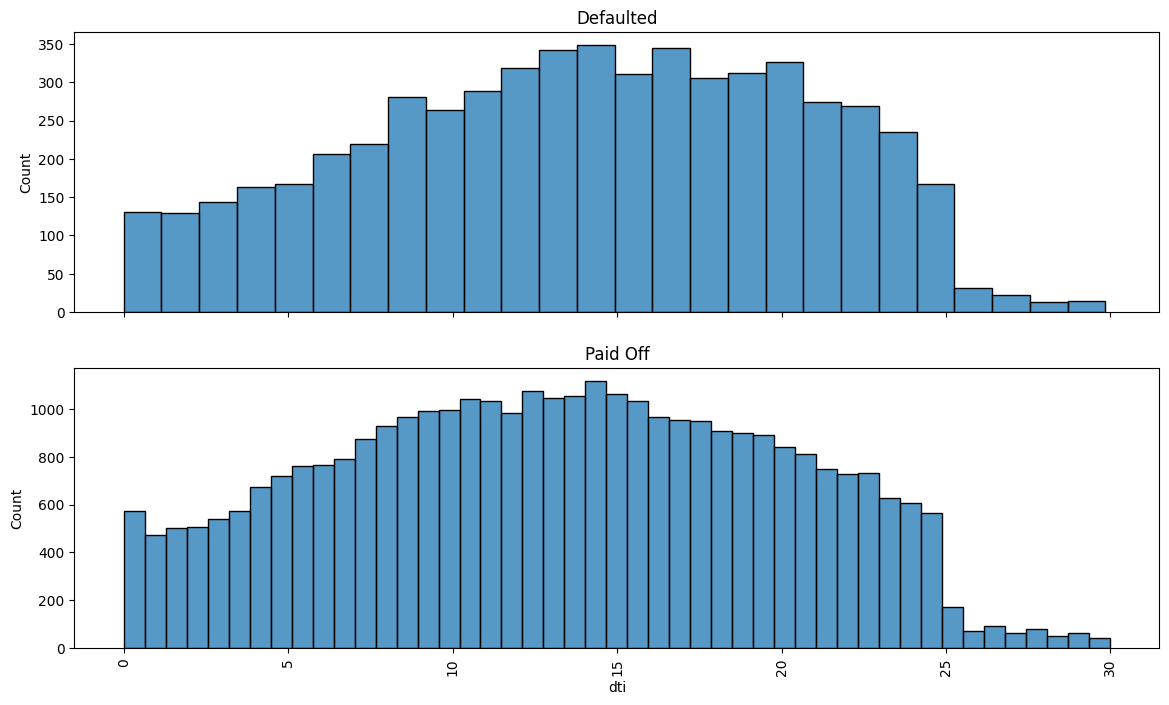

In [90]:
# Debt to income ratio for defaulted and non defaulted


fig, ax = plt.subplots(2,1,sharex=True, figsize = (14,8))
sns.histplot(Defaulted.dti, ax = ax[0]).set(title = 'Defaulted')
sns.histplot(fully_paid.dti, ax = ax[1]).set(title = 'Paid Off')
plt.xticks(rotation=90)
plt.show()

# Observation:
    # DTI distribution for defaulted and paid off portfolio is similar hence it may not act as a good indicator of default
    # However we found an interesting pattern that is beyond DTI of 25 there is a clif effect in the distribution,
    # which suggest that the company doesn't give loan to borrower with higher DTI that often

Distribution of charged off vs fully paid for delinquency 0:
loan_status
Fully Paid    85.65
Charged Off   14.35
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for delinquency 1:
loan_status
Fully Paid    84.19
Charged Off   15.81
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for delinquency 2:
loan_status
Fully Paid    80.68
Charged Off   19.32
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for delinquency 3:
loan_status
Fully Paid    83.49
Charged Off   16.51
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for delinquency 4:
loan_status
Fully Paid    78.33
Charged Off   21.67
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for delinquency 5:
loan_status
Fully Paid    85.71
Charged Off   14.29
Name: proportion, dtype: float64

Distribution of charged off vs fully paid for delinquency 6:
loan_status
Fully Paid    90.00
Charged Off   10.00
Name:

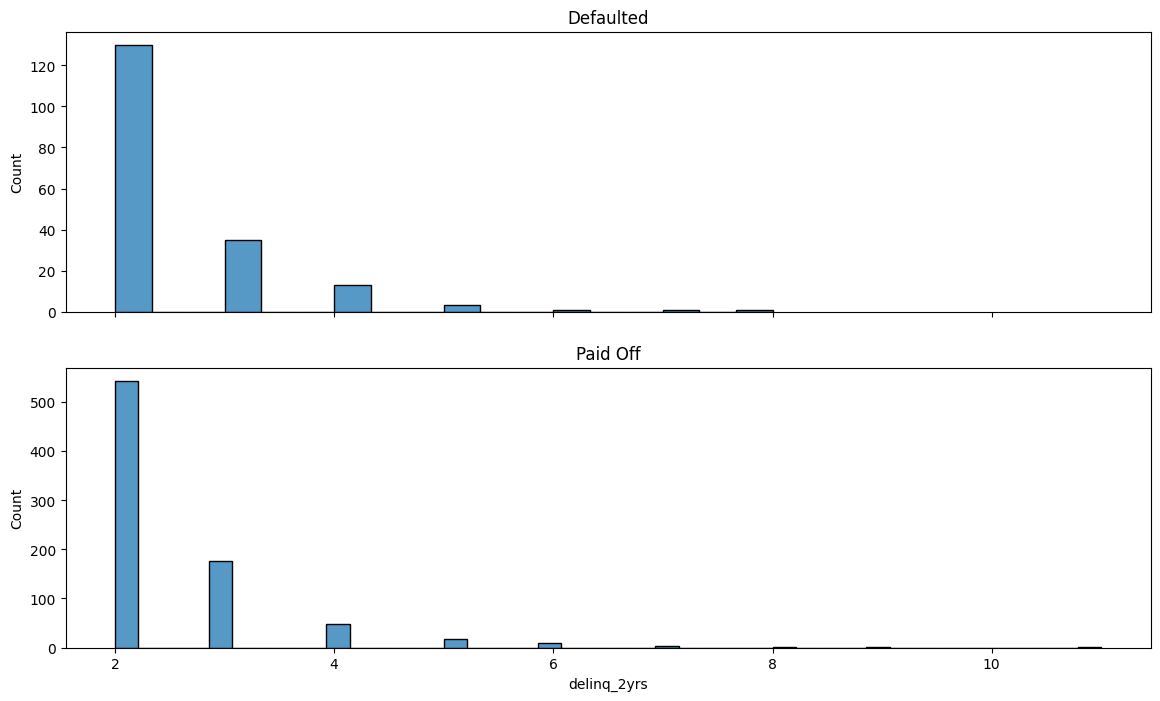

In [91]:
# Delinquency in last 2 years for defaulted and non defaulted


for state in range(0,9):
    dist = df1[df1.delinq_2yrs == state].loan_status.value_counts(normalize = True) * 100
    print(f'Distribution of charged off vs fully paid for delinquency {state}:\n{dist}\n')

fig, ax = plt.subplots(2,1,sharex=True, figsize = (14,8))
sns.histplot(Defaulted[Defaulted.delinq_2yrs > 1].delinq_2yrs, ax = ax[0]).set(title = 'Defaulted')
sns.histplot(fully_paid[fully_paid.delinq_2yrs > 1].delinq_2yrs, ax = ax[1]).set(title = 'Paid Off')

plt.show()

# Observation:
# With increase in delinquency we see that there is general increase in default rate, however this trend is not consistent
# hence we will not consider it as a factor driving default

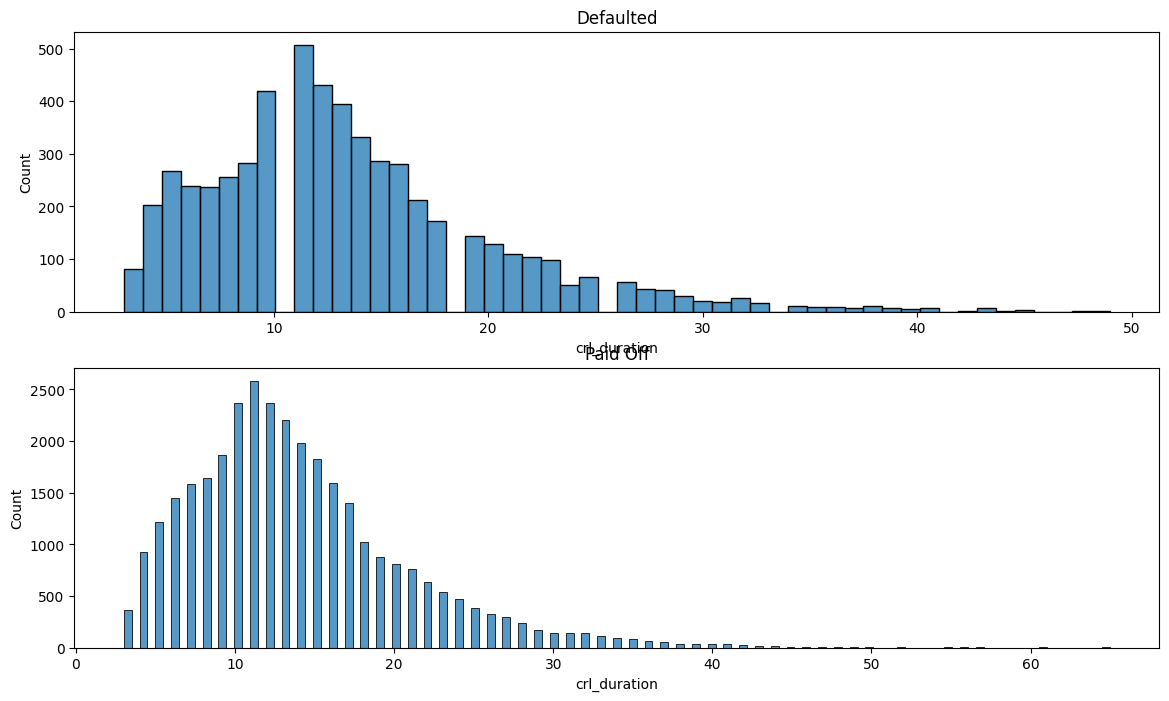

When Credit Line Duration is between 0 and 10:
loan_status
Fully Paid    85.27
Charged Off   14.73
Name: proportion, dtype: float64

When Credit Line Duration is between 10 and 20:
loan_status
Fully Paid    85.15
Charged Off   14.85
Name: proportion, dtype: float64

When Credit Line Duration is between 20 and 30:
loan_status
Fully Paid    86.42
Charged Off   13.58
Name: proportion, dtype: float64

When Credit Line Duration is between 30 and 40:
loan_status
Fully Paid    87.16
Charged Off   12.84
Name: proportion, dtype: float64

When Credit Line Duration is between 40 and 50:
loan_status
Fully Paid    84.48
Charged Off   15.52
Name: proportion, dtype: float64

When Credit Line Duration is between 50 and 60:
loan_status
Fully Paid   100.00
Name: proportion, dtype: float64

When Credit Line Duration is between 60 and 70:
loan_status
Fully Paid   100.00
Name: proportion, dtype: float64



In [92]:
# investigating the derived matric credit line duration with respect to default and paid off
fig, ax = plt.subplots(2,1,sharex=False, figsize = (14,8))
sns.histplot(Defaulted.crl_duration, ax = ax[0]).set(title = 'Defaulted')
sns.histplot(fully_paid.crl_duration, ax = ax[1]).set(title = 'Paid Off')

plt.show()
for x in range(0,70,10):
    crl_dur_dist = df1[(df1.crl_duration >= x) & (df1.crl_duration < x+10)].loan_status.value_counts(normalize = True)*100
    print(f'When Credit Line Duration is between {x} and {x+10}:\n{crl_dur_dist}\n')

#Observation:
    # Credit line duration distribution is similar for both paid off and defaulted portfolio and hence it will not be used as
    # an indicator for default

In [93]:
# investigating inquries in last 6 months with respect to default and paid off
for inq in range(0,9):
    dist = df1[df1.inq_last_6mths == inq].loan_status.value_counts(normalize = True) * 100
    print(f'Distribution of charged off vs fully paid with number of inquery {inq}:\n{dist}\n')

#Observation:
    # For borrowers who have made 6 or more inquries in last 6 months there is a siginificantly higher default percentage

Distribution of charged off vs fully paid with number of inquery 0:
loan_status
Fully Paid    87.81
Charged Off   12.19
Name: proportion, dtype: float64

Distribution of charged off vs fully paid with number of inquery 1:
loan_status
Fully Paid    84.27
Charged Off   15.73
Name: proportion, dtype: float64

Distribution of charged off vs fully paid with number of inquery 2:
loan_status
Fully Paid    83.32
Charged Off   16.68
Name: proportion, dtype: float64

Distribution of charged off vs fully paid with number of inquery 3:
loan_status
Fully Paid    79.25
Charged Off   20.75
Name: proportion, dtype: float64

Distribution of charged off vs fully paid with number of inquery 4:
loan_status
Fully Paid    83.86
Charged Off   16.14
Name: proportion, dtype: float64

Distribution of charged off vs fully paid with number of inquery 5:
loan_status
Fully Paid    80.56
Charged Off   19.44
Name: proportion, dtype: float64

Distribution of charged off vs fully paid with number of inquery 6:
loan_sta

In [94]:
# investigating the public records with respect to default and paid off
for pubrec in df1.pub_rec.unique():
    dist = df1[df1.pub_rec == pubrec].loan_status.value_counts(normalize = True) * 100
    print(f'Distribution of charged off vs fully paid where public records is {pubrec}:\n{dist}\n')
    
# We will not be considering this attribute as a driving factor for default as it is not showing a consistent behaviour

Distribution of charged off vs fully paid where public records is 0:
loan_status
Fully Paid    85.87
Charged Off   14.13
Name: proportion, dtype: float64

Distribution of charged off vs fully paid where public records is 1:
loan_status
Fully Paid    77.30
Charged Off   22.70
Name: proportion, dtype: float64

Distribution of charged off vs fully paid where public records is 2:
loan_status
Fully Paid    79.17
Charged Off   20.83
Name: proportion, dtype: float64

Distribution of charged off vs fully paid where public records is 3:
loan_status
Fully Paid   100.00
Name: proportion, dtype: float64

Distribution of charged off vs fully paid where public records is 4:
loan_status
Fully Paid   100.00
Name: proportion, dtype: float64



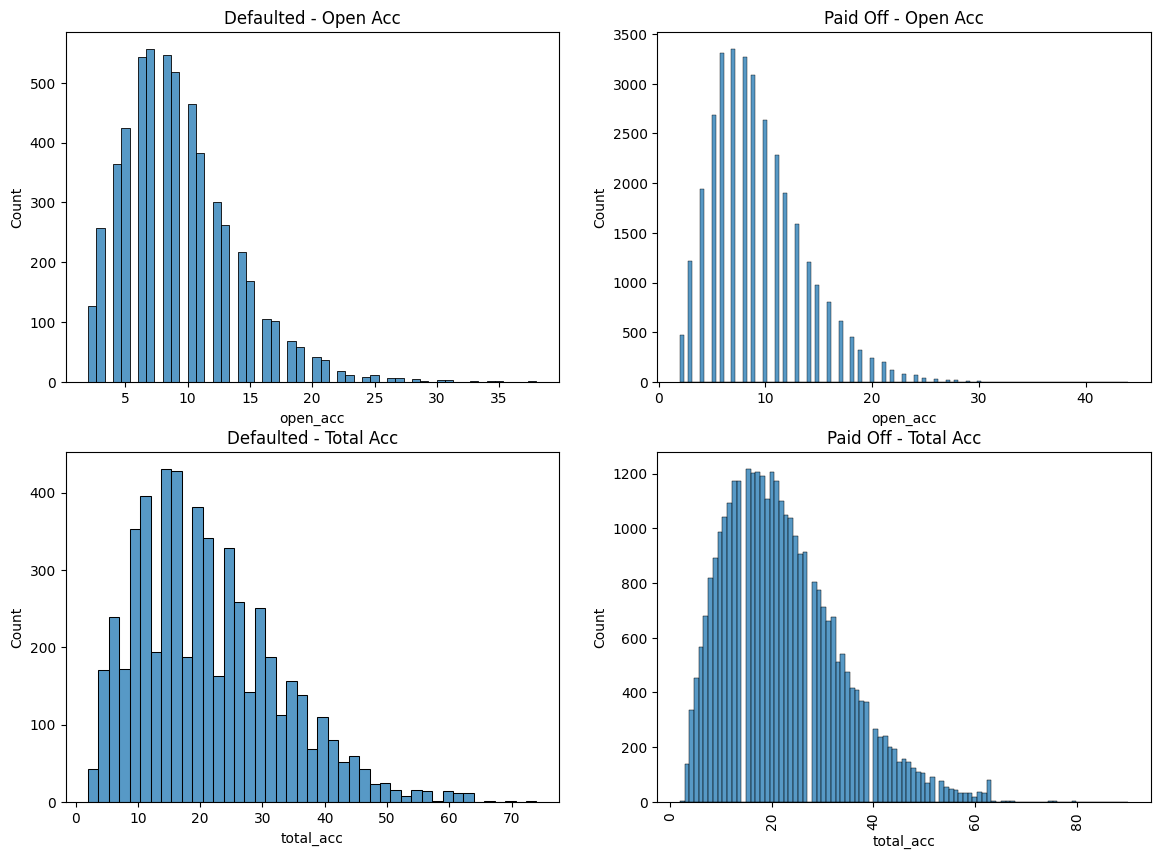

When Open Account is between 0 and 5:
loan_status
Fully Paid    82.84
Charged Off   17.16
Name: proportion, dtype: float64

When Open Account is between 5 and 10:
loan_status
Fully Paid    85.84
Charged Off   14.16
Name: proportion, dtype: float64

When Open Account is between 10 and 15:
loan_status
Fully Paid    85.52
Charged Off   14.48
Name: proportion, dtype: float64

When Open Account is between 15 and 20:
loan_status
Fully Paid    86.32
Charged Off   13.68
Name: proportion, dtype: float64

When Open Account is between 20 and 25:
loan_status
Fully Paid    85.63
Charged Off   14.37
Name: proportion, dtype: float64

When Open Account is between 25 and 30:
loan_status
Fully Paid    79.45
Charged Off   20.55
Name: proportion, dtype: float64

When Open Account is between 30 and 35:
loan_status
Fully Paid    72.73
Charged Off   27.27
Name: proportion, dtype: float64

When Open Account is between 35 and 40:
loan_status
Fully Paid    75.00
Charged Off   25.00
Name: proportion, dtype: floa

In [95]:
# open account and total account for defaulted and non defaulted


fig, ax = plt.subplots(2,2,sharex=False, figsize = (14,10))
sns.histplot(Defaulted.open_acc, ax = ax[0,0]).set(title = 'Defaulted - Open Acc')
sns.histplot(fully_paid.open_acc, ax = ax[0,1]).set(title = 'Paid Off - Open Acc')
sns.histplot(Defaulted.total_acc, ax = ax[1,0]).set(title = 'Defaulted - Total Acc')
sns.histplot(fully_paid.total_acc, ax = ax[1,1]).set(title = 'Paid Off - Total Acc')
plt.xticks(rotation=90)
plt.show()


for x in range(0,45,5):
    op_dist = df1[(df1.open_acc >= x) & (df1.open_acc < x+5)].loan_status.value_counts(normalize = True)*100
    print(f'When Open Account is between {x} and {x+5}:\n{op_dist}\n')
    
for x in range(0,95,5):
    to_dist = df1[(df1.total_acc >= x) & (df1.total_acc < x+5)].loan_status.value_counts(normalize = True)*100
    print(f'When Total Account is between {x} and {x+5}:\n{to_dist}\n')

#Observation:
    # 1. Distribution of total account is similar for both defaulted and paid off portflio and hence we will not consider it as 
    #    an indicator for default.
    # 2. Distribution of open account shows fatter tails for defaulted portfolio in comparision to paid off portfolio,
    #    upon further investigation we also found that when open account is greater than 25 the default rate increases
    #    significantly 

Distribution of charged off vs fully paid when publicily recorded bankruptcy is 0.0:
loan_status
Fully Paid    85.76
Charged Off   14.24
Name: proportion, dtype: float64



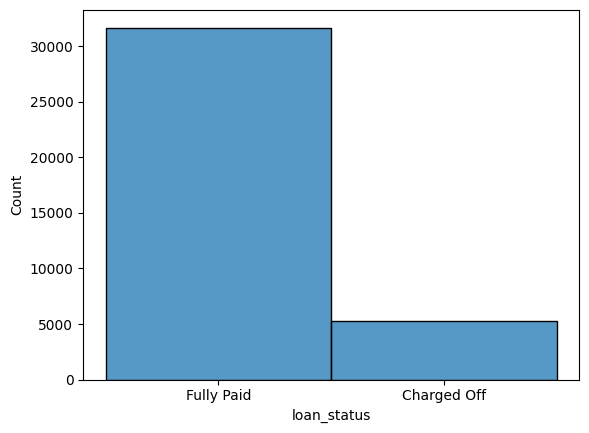

Distribution of charged off vs fully paid when publicily recorded bankruptcy is 1.0:
loan_status
Fully Paid    77.64
Charged Off   22.36
Name: proportion, dtype: float64



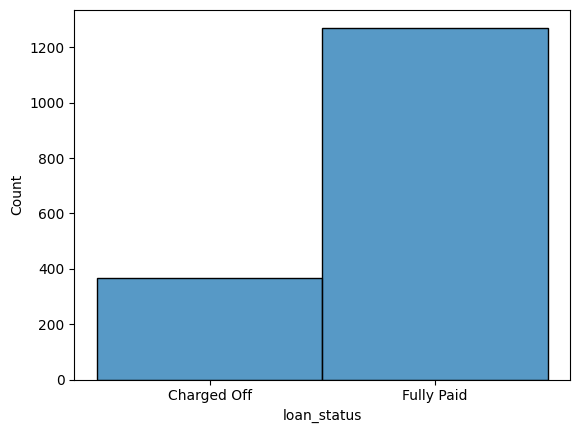

Distribution of charged off vs fully paid when publicily recorded bankruptcy is 2.0:
loan_status
Fully Paid    60.00
Charged Off   40.00
Name: proportion, dtype: float64



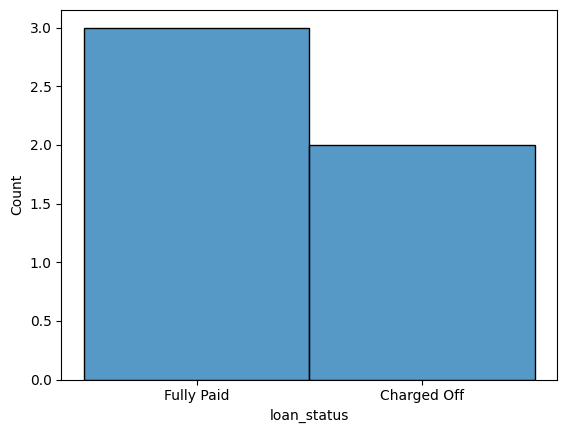

In [96]:
# public record bankruptcies


for pub_rec in df1.pub_rec_bankruptcies.unique():
    dist = df1[df1.pub_rec_bankruptcies == pub_rec].loan_status.value_counts(normalize = True) * 100
    print(f'Distribution of charged off vs fully paid when publicily recorded bankruptcy is {pub_rec}:\n{dist}\n')
    sns.histplot(df1[df1.pub_rec_bankruptcies == pub_rec].loan_status)
    plt.show()
    
# Publicly recorded bankruptcies is a good indicator for default as default rate is directly proportional to number of 
# publicly recorded bankruptcies.

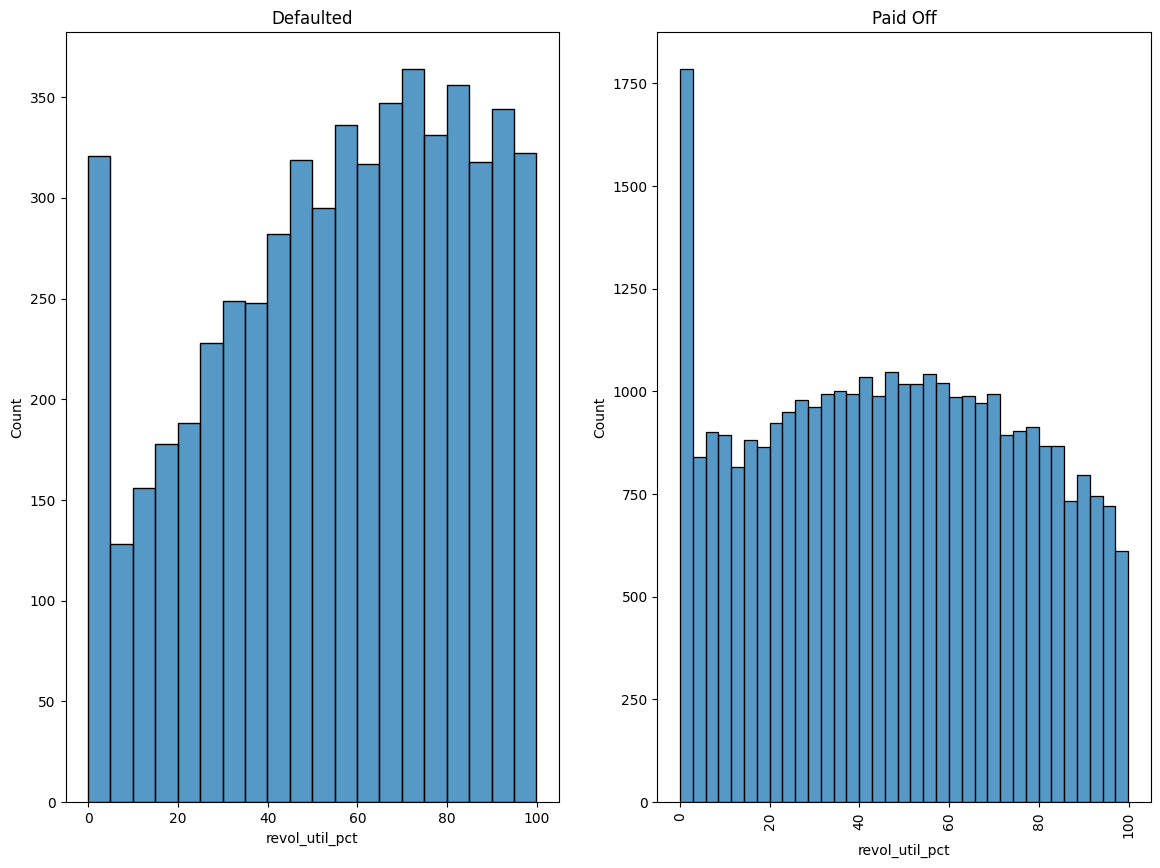

When revolving utilization is between 0% and 5%:
loan_status
Fully Paid    88.06
Charged Off   11.94
Name: proportion, dtype: float64

When revolving utilization is between 5% and 10%:
loan_status
Fully Paid    92.74
Charged Off    7.26
Name: proportion, dtype: float64

When revolving utilization is between 10% and 15%:
loan_status
Fully Paid    90.36
Charged Off    9.64
Name: proportion, dtype: float64

When revolving utilization is between 15% and 20%:
loan_status
Fully Paid    89.50
Charged Off   10.50
Name: proportion, dtype: float64

When revolving utilization is between 20% and 25%:
loan_status
Fully Paid    89.73
Charged Off   10.27
Name: proportion, dtype: float64

When revolving utilization is between 25% and 30%:
loan_status
Fully Paid    87.90
Charged Off   12.10
Name: proportion, dtype: float64

When revolving utilization is between 30% and 35%:
loan_status
Fully Paid    87.48
Charged Off   12.52
Name: proportion, dtype: float64

When revolving utilization is between 35% an

In [97]:
# Analyzing distribution of revolving utilization for defaulted and paid off portfolio

fig, ax = plt.subplots(1,2,sharex=False, figsize = (14,10))
sns.histplot(Defaulted.revol_util_pct, ax = ax[0]).set(title = 'Defaulted')
sns.histplot(fully_paid.revol_util_pct, ax = ax[1]).set(title = 'Paid Off')
plt.xticks(rotation=90)
plt.show()

for x in range(0,100,5):
    dist = df1[(df1.revol_util_pct >= x) & (df1.revol_util_pct < x+5)].loan_status.value_counts(normalize = True)*100
    print(f'When revolving utilization is between {x}% and {x+5}%:\n{dist}\n')
    
#Observation:
    # When revolving utilization is higher than 90% then we observe a siginificant increase in default ratio

## 5. Conclusion

1. Term of the loan is an important driving factor for default, shorter the maturity of the loan less risky it will be.
2. Grade is also a driving factor for the default, lower the grade higher is the chance of default.
3. Loan given for setting up small business carries the heightes amount of risk followed by loan for renewable energies and education.
4. Following states show higher default ratio:
> MO, FL, NV, AK, SD, NE <br>
> Among these NV and NE shows the heighest default ratio
5. Borrower who made 6 or more inquries in last 6 months shows a higher tendency of default
6. Borrower who has 25 or more open account shows a higher tendency of default
7. Borrower with 90% or more revolving utilization shows a higher tendency of default 
8. If a customer has any public record of bankrupticy then there is a much higher likelyhood of default for that borrower
9. Interest rate may look like as if it is good factor to identify default, however one must not take the higher correlation between high interest rate and default rate for the causation of default. Often finincial institutes charge higher interest rate to high risk customer to compensate for the added risk, and since most of the time it is these high risk customer that default, we see a positive relationship between high interest rate and default, however interest rate is not a leading indicator of default but rather a lagging one.

## 6. Recommendation

1. The company should increase its long term loan exposure with better grade customer and at the same time should reduce its long term loan with the poor graded customer
2. The company should be extra cautious when approving loan for small business, if possible company should ask for collaterals if a poor graded borrower ask for business loan that too for long term
3. For few state like NV and NE where default rate is really high, company may consider closing its business there, given that these states gives a very small proportion of business to the company.
4. Company should add additional checks based on higher number of open accounts, higher revolving utilization while approving a new loan
5. For customers with 2 or more publicly recorded bankruptcy the company should not approve the loan